In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
data = pd.read_csv('mhealth_full.csv')

In [101]:
data.shape

(1215745, 23)

In [102]:
data.head()

acc_ch_x  acc_ch_y  acc_ch_z  acc_la_x  acc_la_y  acc_la_z  gyr_la_x  \
0   -9.8184  0.009971   0.29563    2.1849   -9.6967   0.63077  0.103900   
1   -9.8489  0.524040   0.37348    2.3876   -9.5080   0.68389  0.085343   
2   -9.6602  0.181850   0.43742    2.4086   -9.5674   0.68113  0.085343   
3   -9.6507  0.214220   0.24033    2.1814   -9.4301   0.55031  0.085343   
4   -9.7030  0.303890   0.31156    2.4173   -9.3889   0.71098  0.085343   

   gyr_la_y  gyr_la_z  mag_la_x  ...  acc_rw_y  acc_rw_z  gyr_rw_x  gyr_rw_y  \
0  -0.84053  -0.68762 -0.370000  ...   -4.5781  0.187760  -0.44902   -1.0103   
1  -0.83865  -0.68369 -0.197990  ...   -4.3198  0.023595  -0.44902   -1.0103   
2  -0.83865  -0.68369 -0.374170  ...   -4.2772  0.275720  -0.44902   -1.0103   
3  -0.83865  -0.68369 -0.017271  ...   -4.3163  0.367520  -0.45686   -1.0082   
4  -0.83865  -0.68369 -0.374390  ...   -4.1459  0.407290  -0.45686   -1.0082   

   gyr_rw_z  mag_rw_x  mag_rw_y  mag_rw_z  activity   subject  
0  0.034483  -2.35000 -1.610200 -0.030899         0  subject1  
1  0.034483  -2.16320 -0.882540  0.326570         0  subject1  
2  0.034483  -1.61750 -0.165620 -0.030693         0  subject1  
3  0.025862  -1.07710  0.006945 -0.382620         0  subject1  
4  0.025862  -0.53684  0.175900 -1.095500         0  subject1  

[5 rows x 23 columns]

In [103]:
# Note: No non-null data according to dataframe information. Dataset is in a good state
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 23 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   acc_ch_x  1215745 non-null  float64
 1   acc_ch_y  1215745 non-null  float64
 2   acc_ch_z  1215745 non-null  float64
 3   acc_la_x  1215745 non-null  float64
 4   acc_la_y  1215745 non-null  float64
 5   acc_la_z  1215745 non-null  float64
 6   gyr_la_x  1215745 non-null  float64
 7   gyr_la_y  1215745 non-null  float64
 8   gyr_la_z  1215745 non-null  float64
 9   mag_la_x  1215745 non-null  float64
 10  mag_la_y  1215745 non-null  float64
 11  mag_la_z  1215745 non-null  float64
 12  acc_rw_x  1215745 non-null  float64
 13  acc_rw_y  1215745 non-null  float64
 14  acc_rw_z  1215745 non-null  float64
 15  gyr_rw_x  1215745 non-null  float64
 16  gyr_rw_y  1215745 non-null  float64
 17  gyr_rw_z  1215745 non-null  float64
 18  mag_rw_x  1215745 non-null  float64
 19  mag_rw_y  1215745 non

In [104]:
# Note: It appears that the amount of observations produced by each subject in the experiment are relatively
# comparable. Resampling may be unnecessary here
data.subject.value_counts()

subject1     161280
subject9     135168
subject2     130561
subject8     129024
subject3     122112
subject5     119808
subject4     116736
subject7     104448
subject10     98304
subject6      98304
Name: subject, dtype: int64

In [105]:
data['activity'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

In [106]:
# Note: It appears that the data is unbalanced in regards to the 0 (null) category. Therefore, we will resample
# this category to have a more balanced dataset.
data['activity'].value_counts()

0     872550
1      30720
2      30720
3      30720
4      30720
5      30720
9      30720
10     30720
11     30720
7      29441
8      29337
6      28315
12     10342
Name: activity, dtype: int64

<AxesSubplot:>

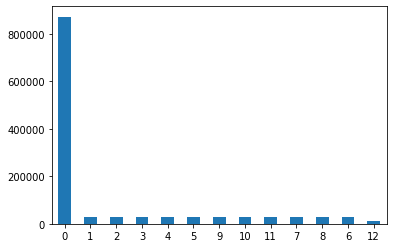

In [112]:
# Visualization of imbalance:
data['activity'].value_counts().plot.bar(rot=0)

In [23]:
# Resampling activity 0 to 30720 observations
data_activity_0 = data[data['activity'] == 0]
data_activity_else = data[data['activity'] != 0]

data_activity_0 = data_activity_0.sample(n=30720, random_state=1)
data = pd.concat([data_activity_0, data_activity_else])

In [25]:
data['activity'].value_counts()

0     30720
1     30720
2     30720
3     30720
4     30720
5     30720
9     30720
10    30720
11    30720
7     29441
8     29337
6     28315
12    10342
Name: activity, dtype: int64

In [26]:
# L1: Standing still (1 min)
# L2: Sitting and relaxing (1 min)
# L3: Lying down (1 min)
# L4: Walking (1 min)
# L5: Climbing stairs (1 min)
# L6: Waist bends forward (20x)
# L7: Frontal elevation of arms (20x)
# L8: Knees bending (crouching) (20x)
# L9: Cycling (1 min)
# L10: Jogging (1 min)
# L11: Running (1 min)
# L12: Jump front & back (20x)
activity_map = {
    1: 'Standing still (1 min)',  
    2: 'Sitting and relaxing (1 min)', 
    3: 'Lying down (1 min)',  
    4: 'Walking (1 min)',  
    5: 'Climbing stairs (1 min)',  
    6: 'Waist bends forward (20x)',
    7: 'Frontal elevation of arms (20x)', 
    8: 'Knees bending (crouching) (20x)', 
    9: 'Cycling (1 min)', 
    10: 'Jogging (1 min)', 
    11: 'Running (1 min)', 
    12: 'Jump front & back (20x)' 
}

=================================== Standing still (1 min) - acc ===================================


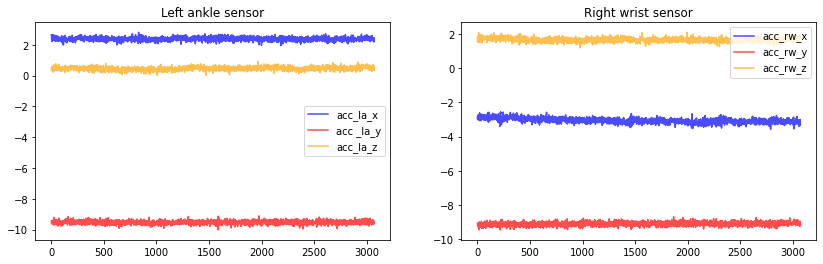

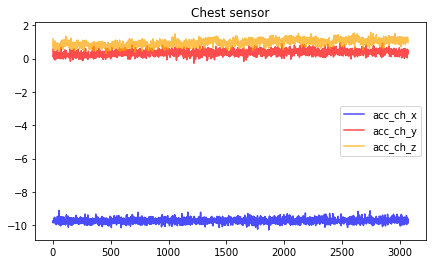

=================================== Standing still (1 min) - gyr ===================================


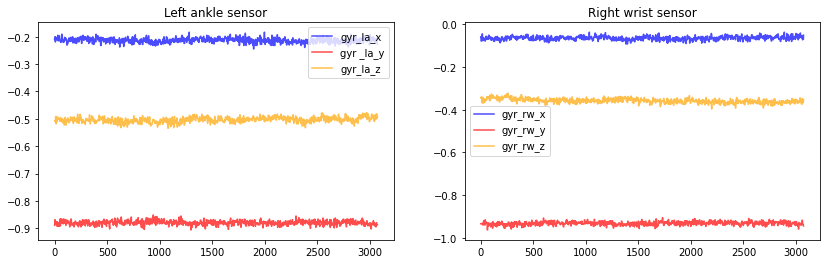

=================================== Standing still (1 min) - mag ===================================


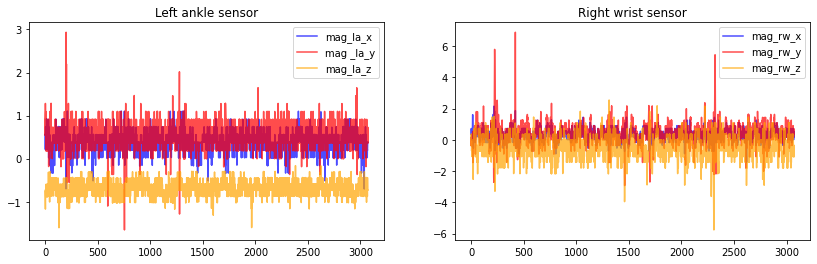

=================================== Sitting and relaxing (1 min) - acc ===================================


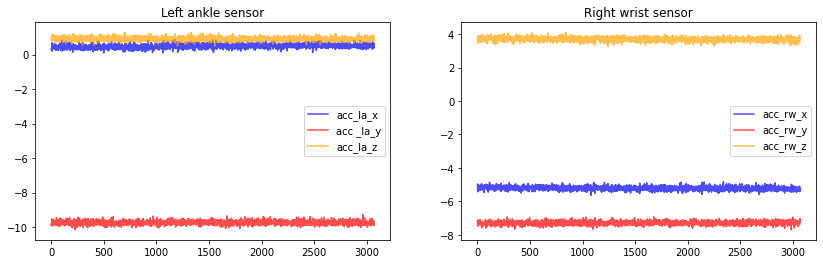

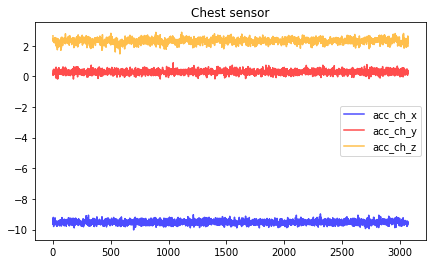

=================================== Sitting and relaxing (1 min) - gyr ===================================


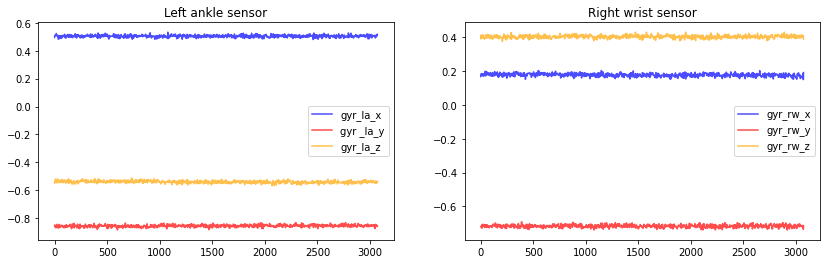

=================================== Sitting and relaxing (1 min) - mag ===================================


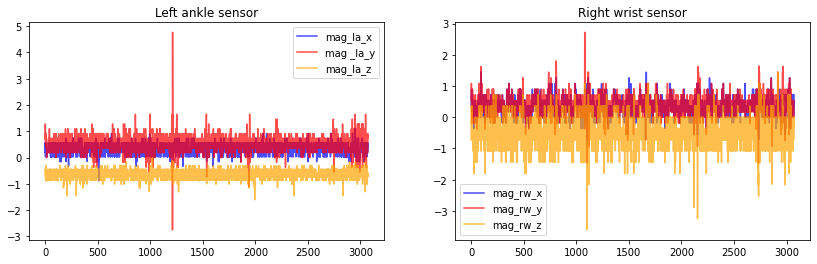

=================================== Lying down (1 min) - acc ===================================


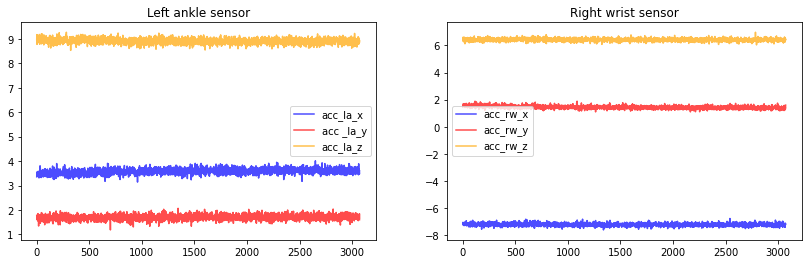

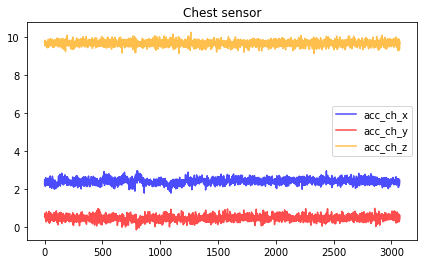

=================================== Lying down (1 min) - gyr ===================================


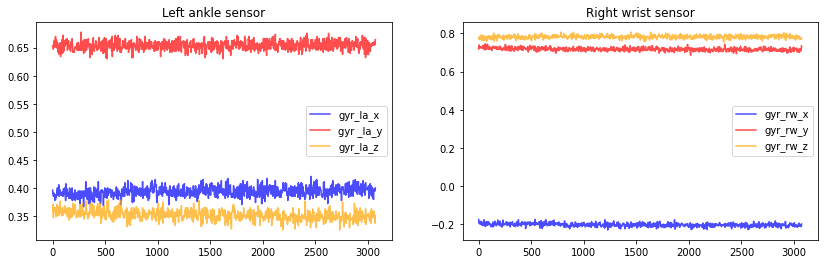

=================================== Lying down (1 min) - mag ===================================


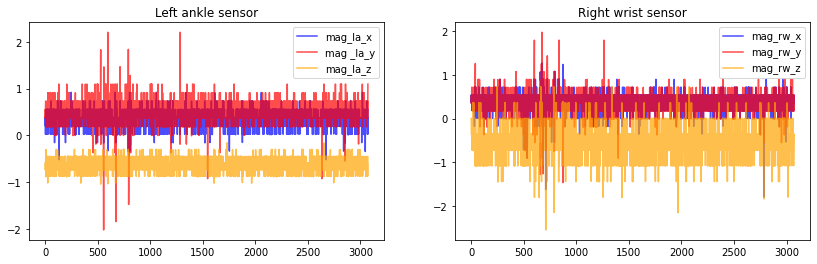

=================================== Walking (1 min) - acc ===================================


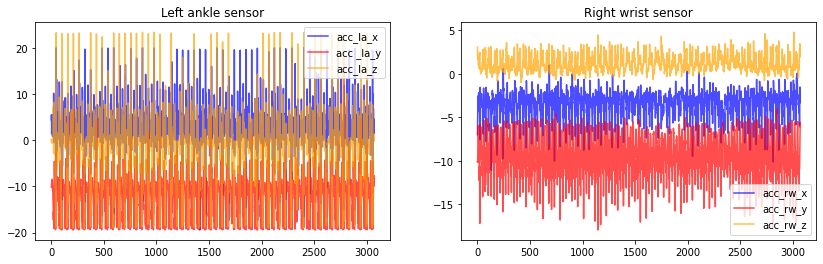

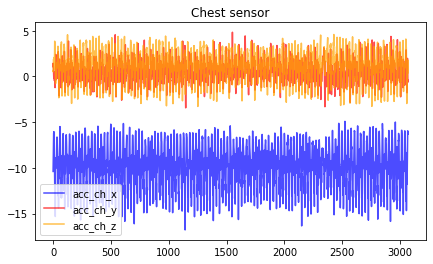

=================================== Walking (1 min) - gyr ===================================


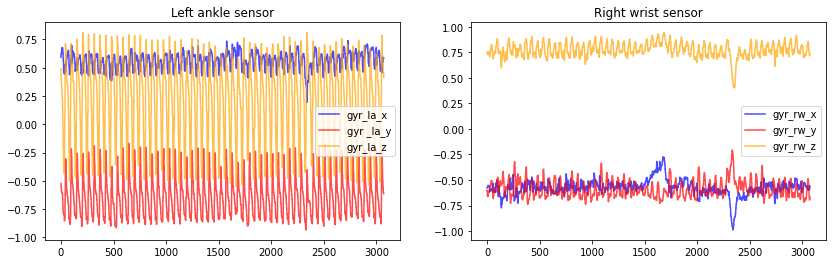

=================================== Walking (1 min) - mag ===================================


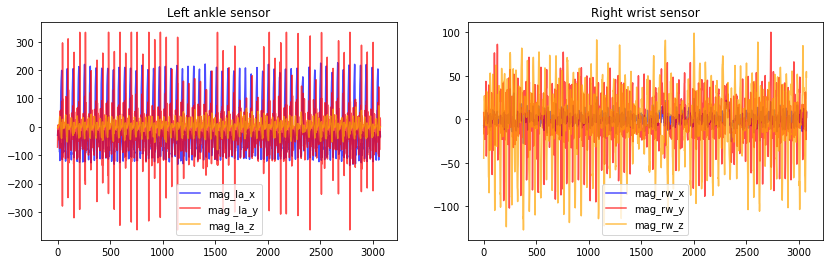

=================================== Climbing stairs (1 min) - acc ===================================


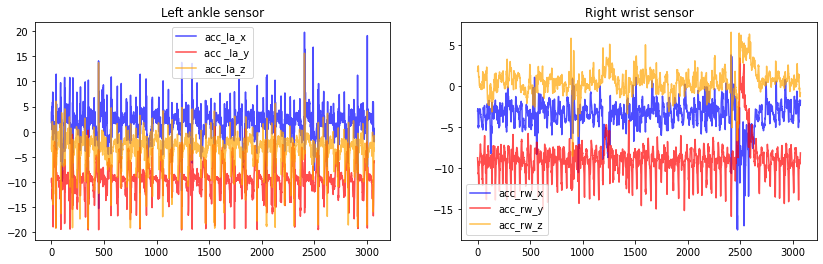

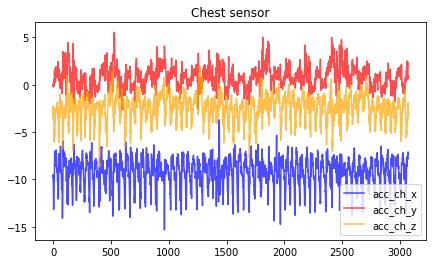

=================================== Climbing stairs (1 min) - gyr ===================================


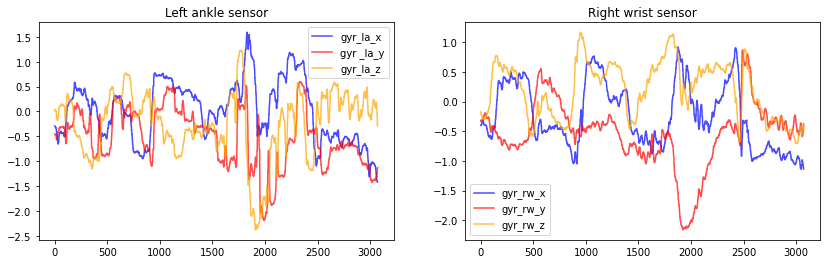

=================================== Climbing stairs (1 min) - mag ===================================


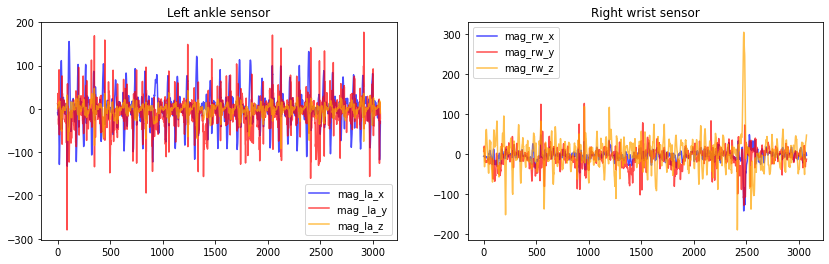

=================================== Waist bends forward (20x) - acc ===================================


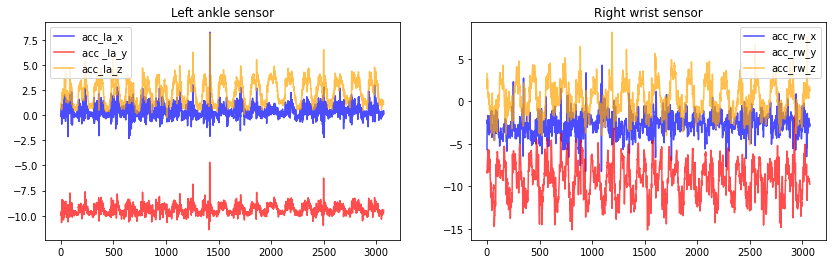

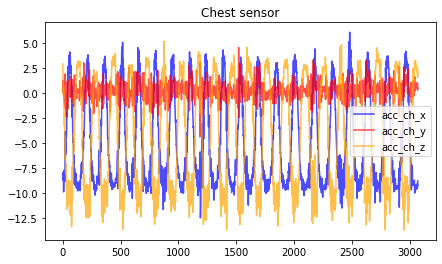

=================================== Waist bends forward (20x) - gyr ===================================


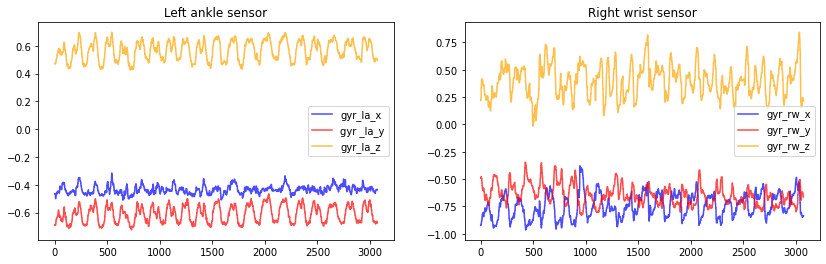

=================================== Waist bends forward (20x) - mag ===================================


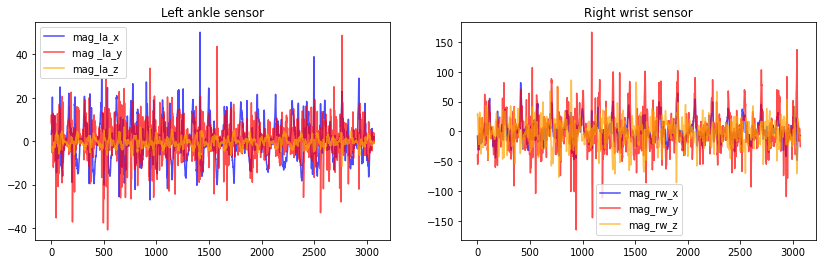

=================================== Frontal elevation of arms (20x) - acc ===================================


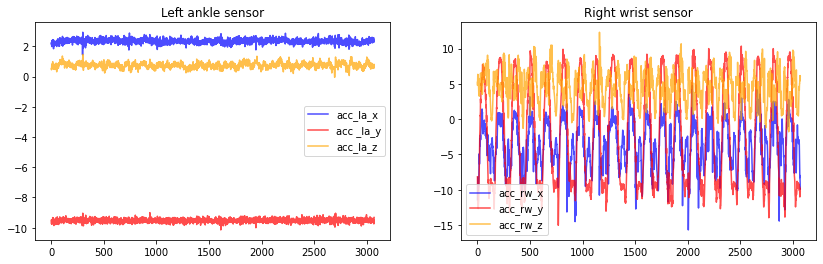

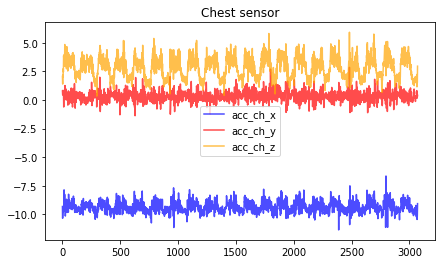

=================================== Frontal elevation of arms (20x) - gyr ===================================


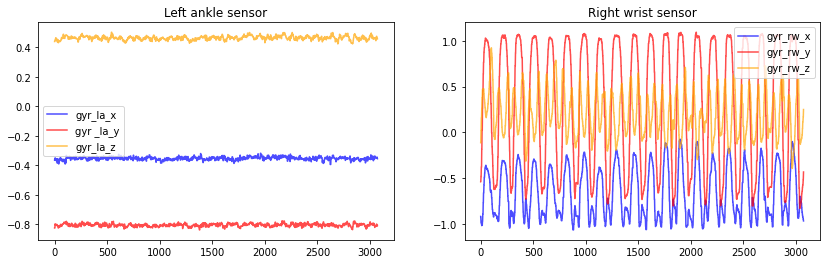

=================================== Frontal elevation of arms (20x) - mag ===================================


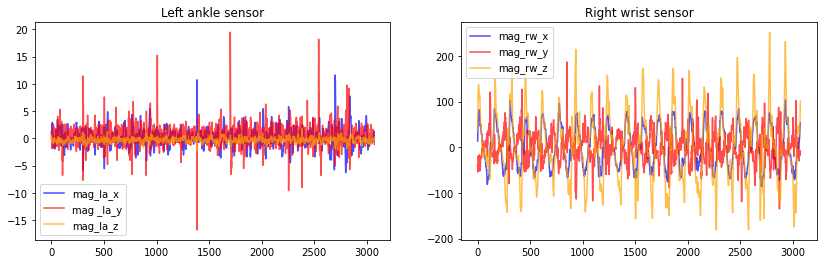

=================================== Knees bending (crouching) (20x) - acc ===================================


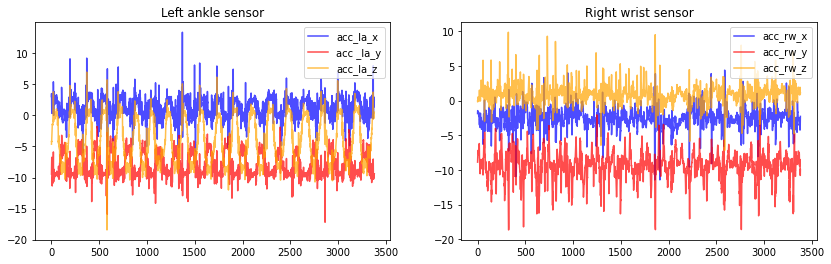

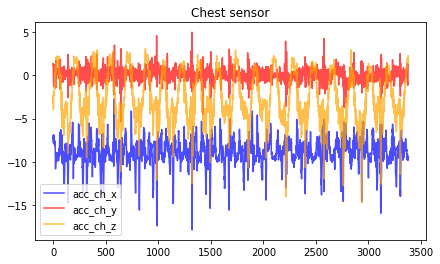

=================================== Knees bending (crouching) (20x) - gyr ===================================


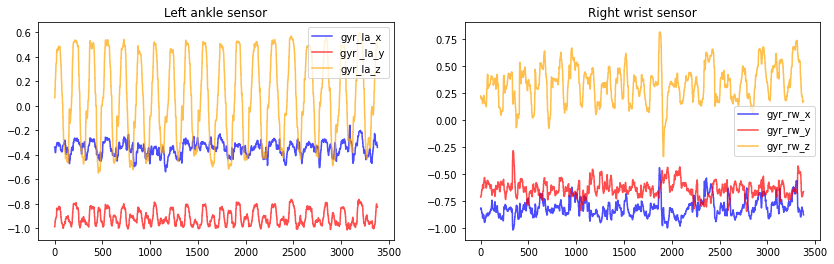

=================================== Knees bending (crouching) (20x) - mag ===================================


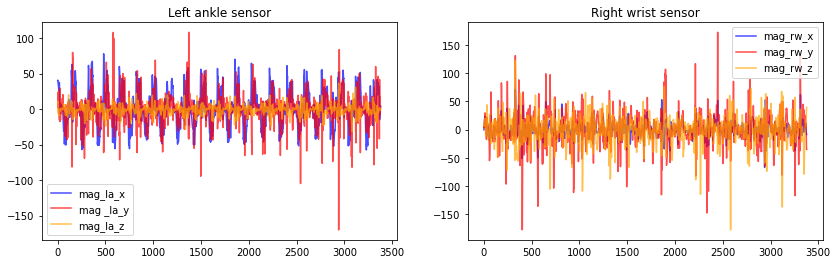

=================================== Cycling (1 min) - acc ===================================


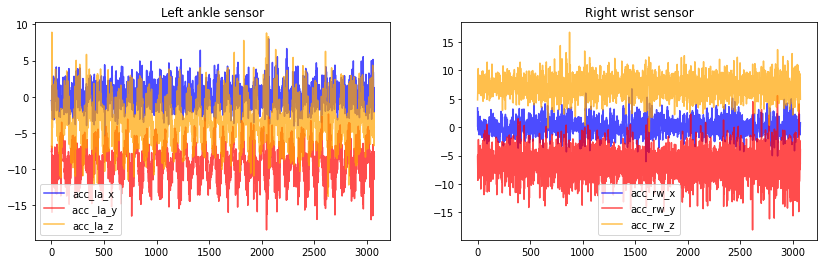

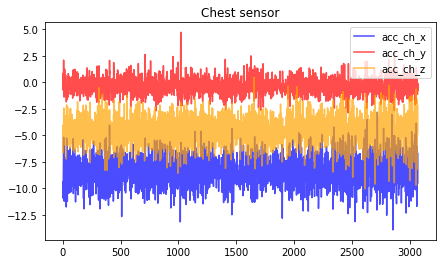

=================================== Cycling (1 min) - gyr ===================================


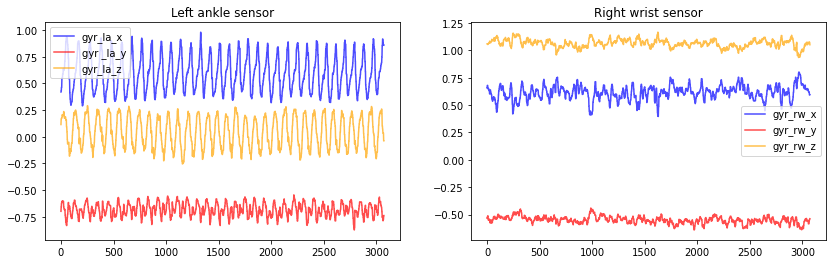

=================================== Cycling (1 min) - mag ===================================


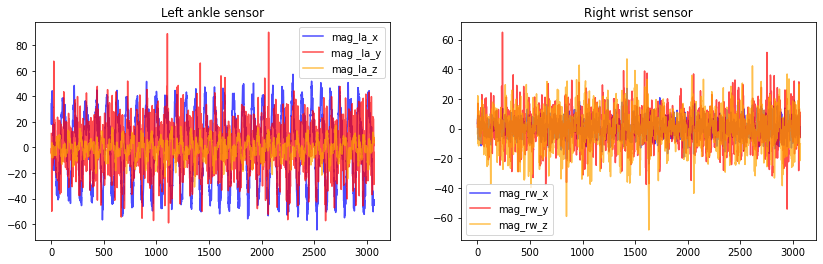

=================================== Jogging (1 min) - acc ===================================


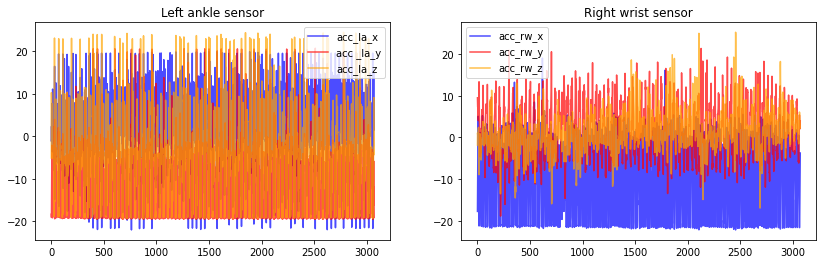

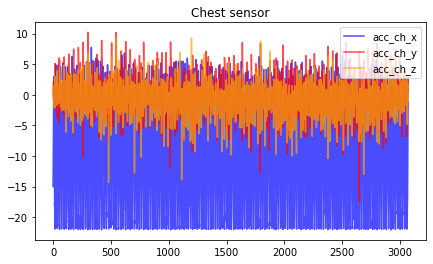

=================================== Jogging (1 min) - gyr ===================================


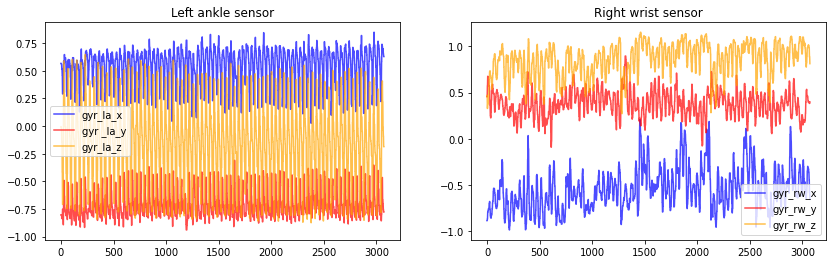

=================================== Jogging (1 min) - mag ===================================


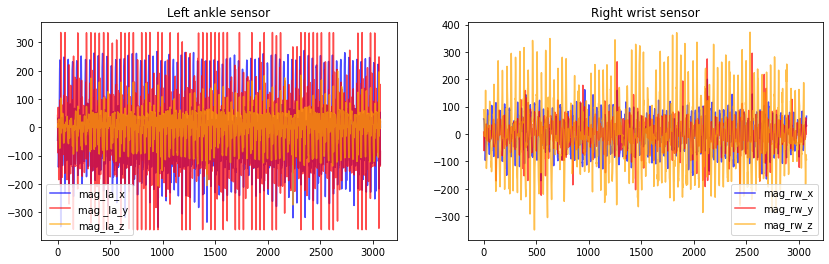

=================================== Running (1 min) - acc ===================================


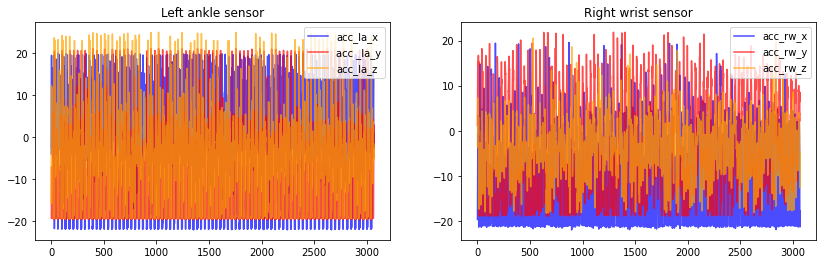

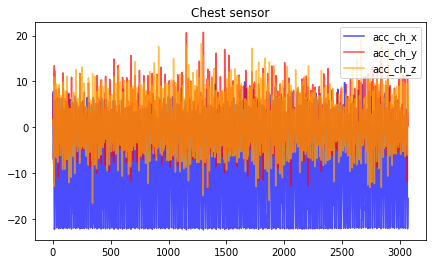

=================================== Running (1 min) - gyr ===================================


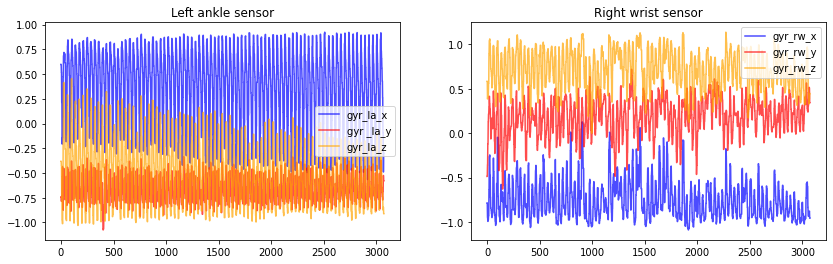

=================================== Running (1 min) - mag ===================================


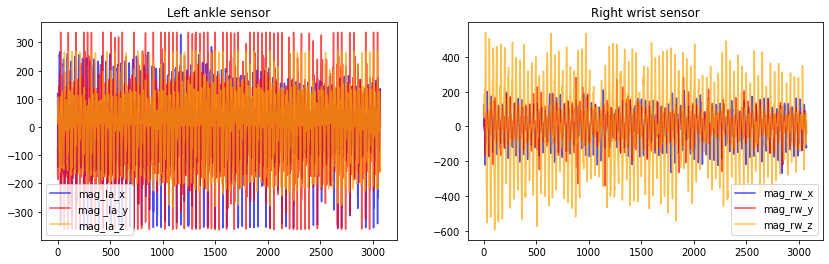

=================================== Jump front & back (20x) - acc ===================================


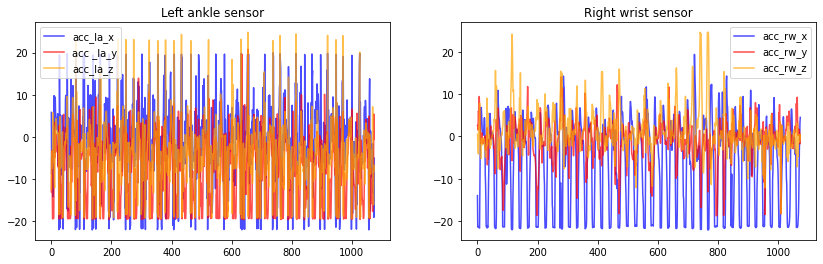

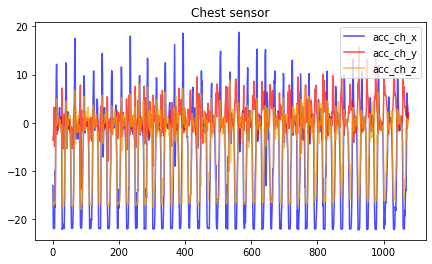

=================================== Jump front & back (20x) - gyr ===================================


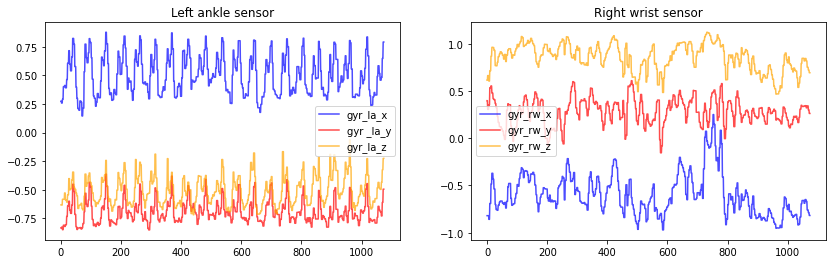

=================================== Jump front & back (20x) - mag ===================================


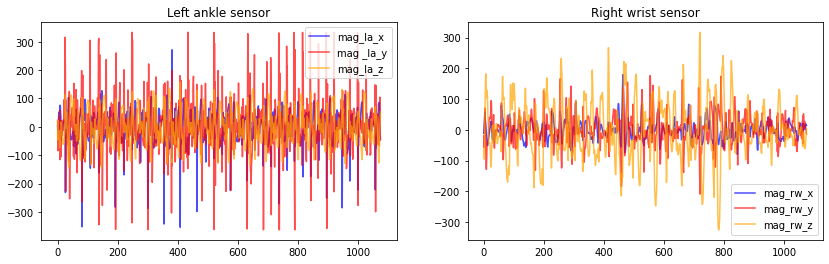

In [69]:
# Create plots for one particular subject performing the activities - using subject 1 since it has the most data
# Each plot section divided by activity and type of reading taken
subject_1 = data[data['subject'] == 'subject1']
readings = ['acc', 'gyr', 'mag']

for i in range(1, 13):
    for r in readings:

        print(f'=================================== {activity_map[i]} - {r} ===================================')
        
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.plot(subject_1[subject_1['activity']==i].reset_index(drop=True)[r + '_la_x'], color='blue', alpha=.7, label= r + '_la_x')
        plt.plot(subject_1[subject_1['activity']==i].reset_index(drop=True)[r + '_la_y'],color='red', alpha=.7, label= r +' _la_y')
        plt.plot(subject_1[subject_1['activity']==i].reset_index(drop=True)[r + '_la_z'],color='orange', alpha=.7, label= r + '_la_z')
        plt.title('Left ankle sensor')
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.plot(subject_1[subject_1['activity']==i].reset_index(drop=True)[r + '_rw_x'], color='blue', alpha=.7, label= r + '_rw_x')
        plt.plot(subject_1[subject_1['activity']==i].reset_index(drop=True)[r + '_rw_y'],color='red', alpha=.7, label= r + '_rw_y')
        plt.plot(subject_1[subject_1['activity']==i].reset_index(drop=True)[r + '_rw_z'],color='orange', alpha=.7, label= r + '_rw_z')
        plt.title('Right wrist sensor')
        plt.legend()
        plt.show()
        
        # No magnetometer or gyroscope data for the chest sensor
        if r == 'acc':
            plt.figure(figsize=(7,4))
            plt.plot(subject_1[subject_1['activity']==i].reset_index(drop=True)[r + '_ch_x'], color='blue', alpha=.7, label= r + '_ch_x')
            plt.plot(subject_1[subject_1['activity']==i].reset_index(drop=True)[r + '_ch_y'],color='red', alpha=.7, label= r + '_ch_y')
            plt.plot(subject_1[subject_1['activity']==i].reset_index(drop=True)[r + '_ch_z'],color='orange', alpha=.7, label= r + '_ch_z')
            plt.title('Chest sensor')
            plt.legend() 
            plt.show()

=================================== Standing still (1 min) - acc ===================================


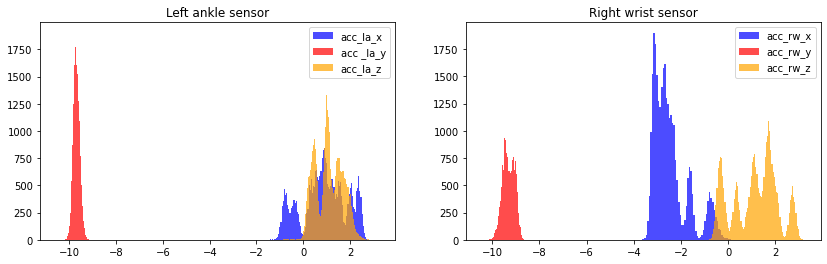

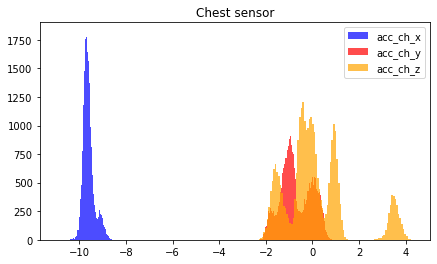

=================================== Standing still (1 min) - gyr ===================================


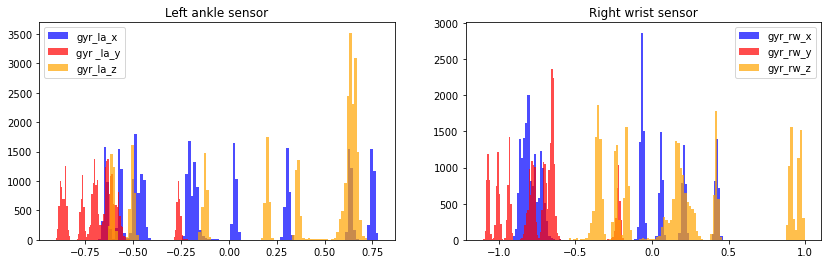

=================================== Standing still (1 min) - mag ===================================


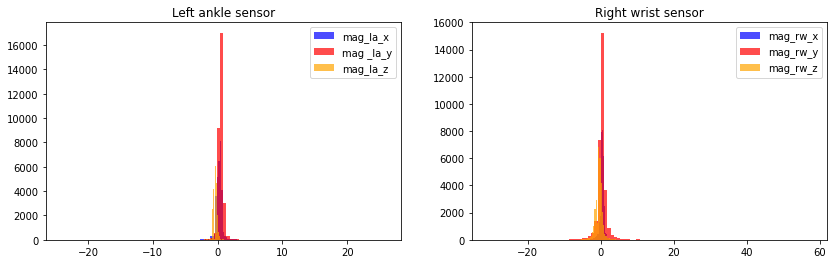

=================================== Sitting and relaxing (1 min) - acc ===================================


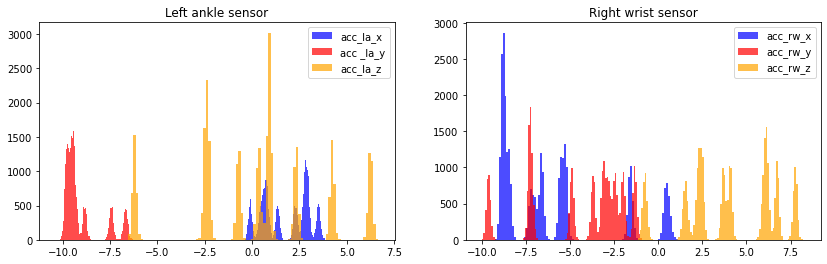

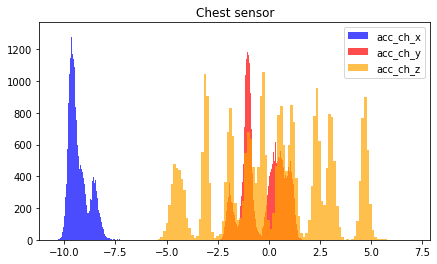

=================================== Sitting and relaxing (1 min) - gyr ===================================


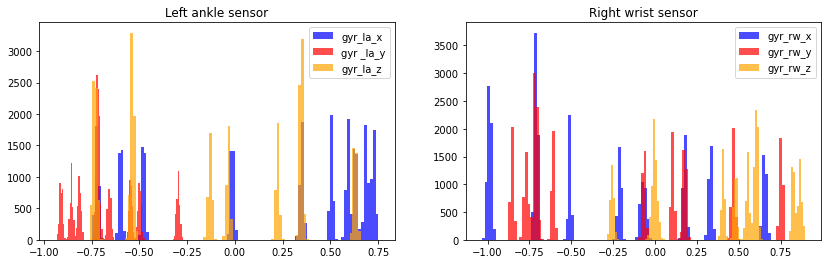

=================================== Sitting and relaxing (1 min) - mag ===================================


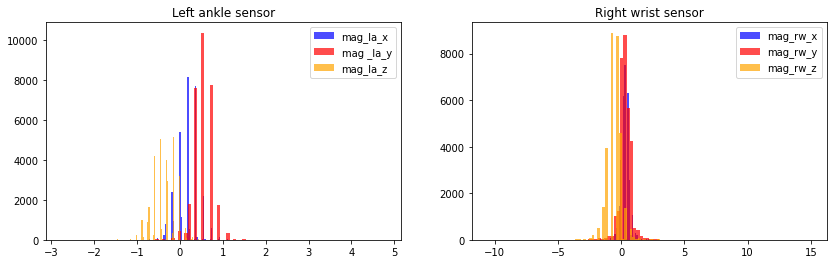

=================================== Lying down (1 min) - acc ===================================


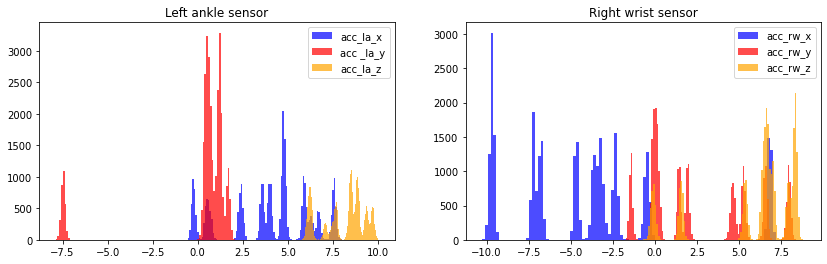

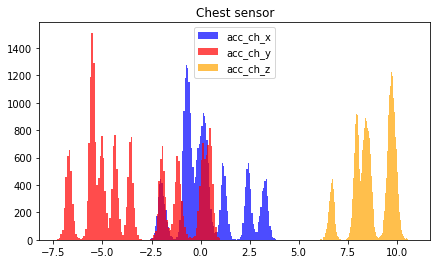

=================================== Lying down (1 min) - gyr ===================================


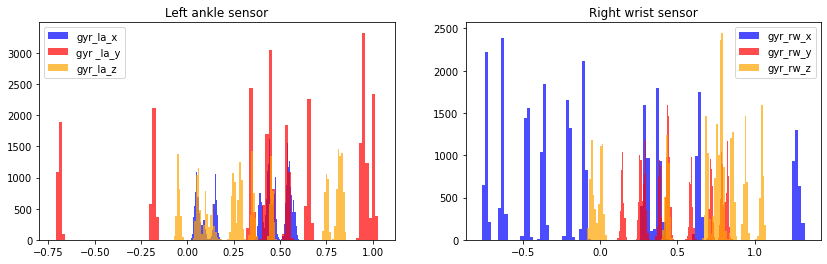

=================================== Lying down (1 min) - mag ===================================


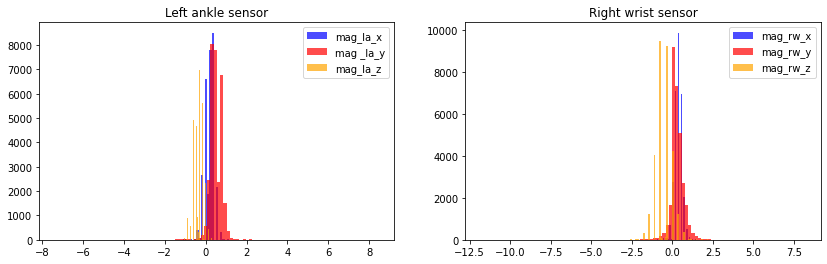

=================================== Walking (1 min) - acc ===================================


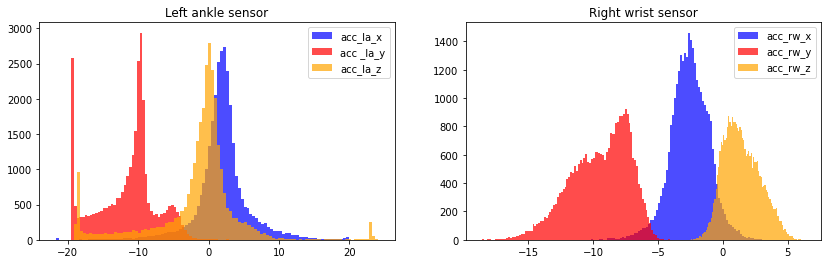

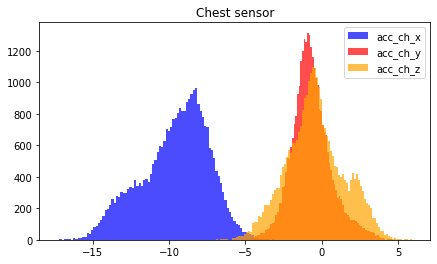

=================================== Walking (1 min) - gyr ===================================


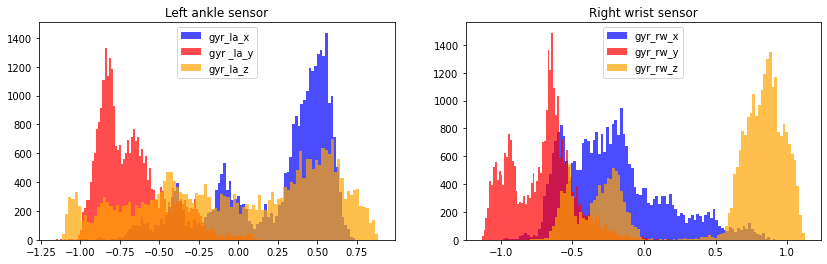

=================================== Walking (1 min) - mag ===================================


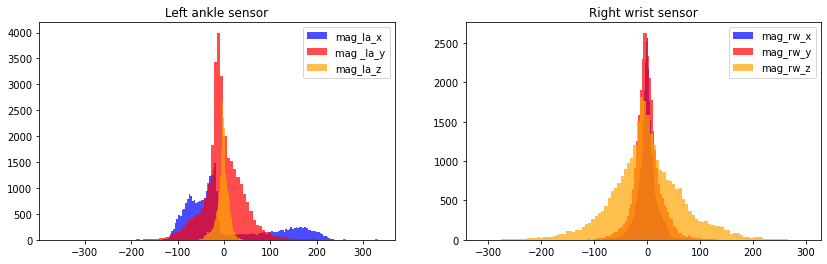

=================================== Climbing stairs (1 min) - acc ===================================


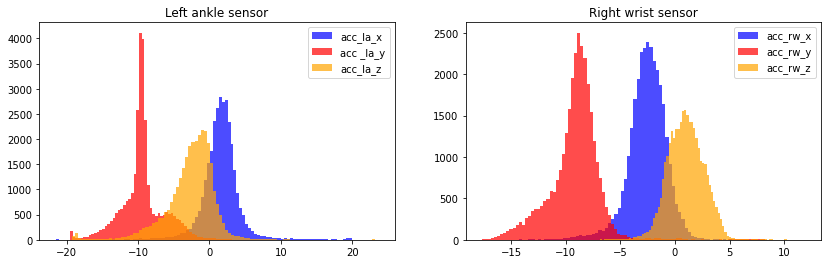

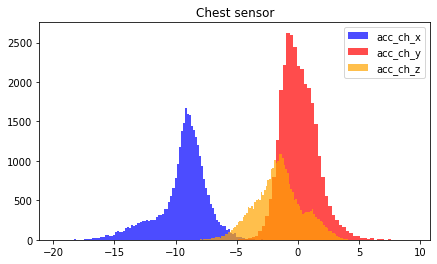

=================================== Climbing stairs (1 min) - gyr ===================================


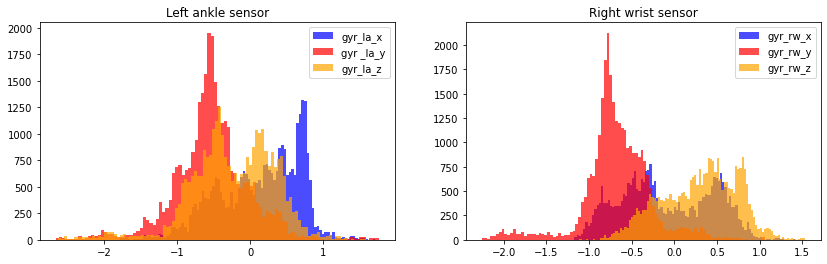

=================================== Climbing stairs (1 min) - mag ===================================


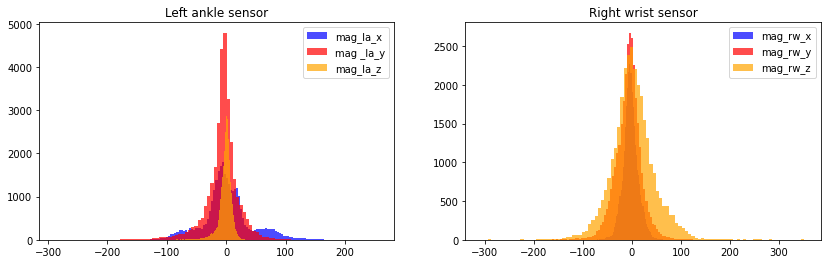

=================================== Waist bends forward (20x) - acc ===================================


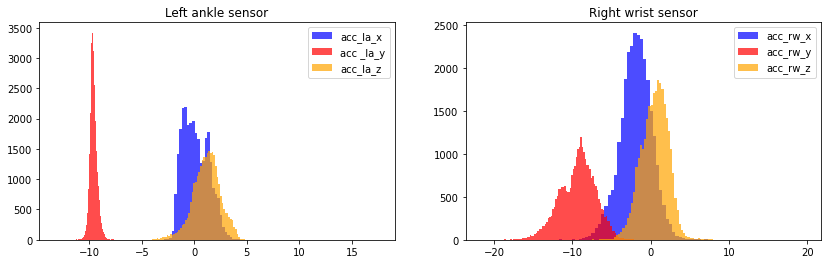

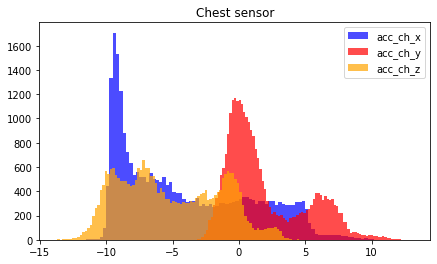

=================================== Waist bends forward (20x) - gyr ===================================


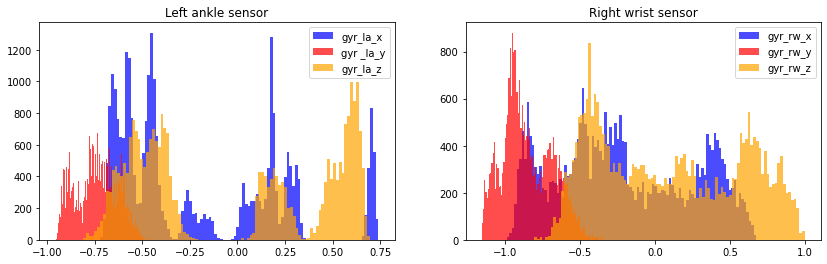

=================================== Waist bends forward (20x) - mag ===================================


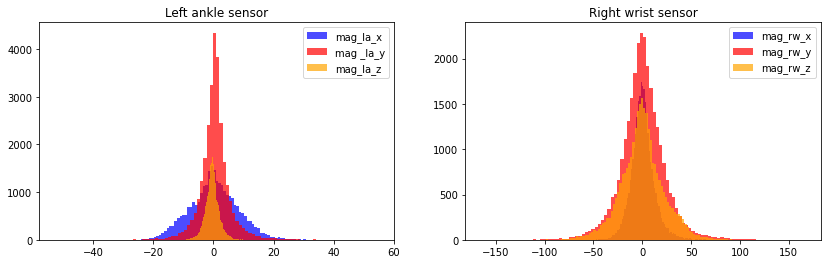

=================================== Frontal elevation of arms (20x) - acc ===================================


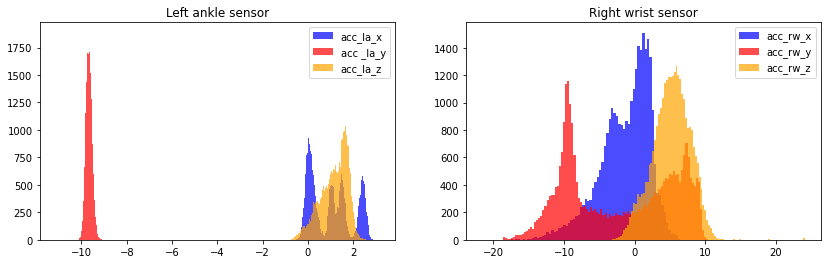

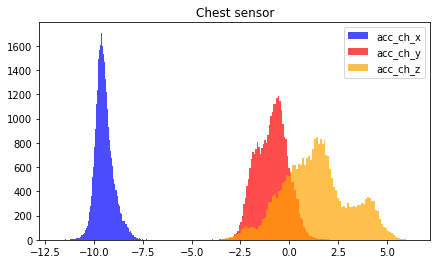

=================================== Frontal elevation of arms (20x) - gyr ===================================


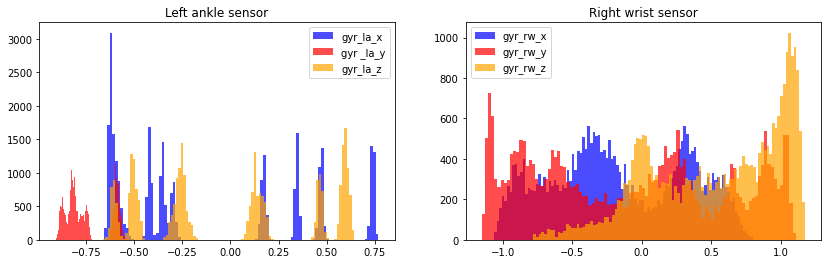

=================================== Frontal elevation of arms (20x) - mag ===================================


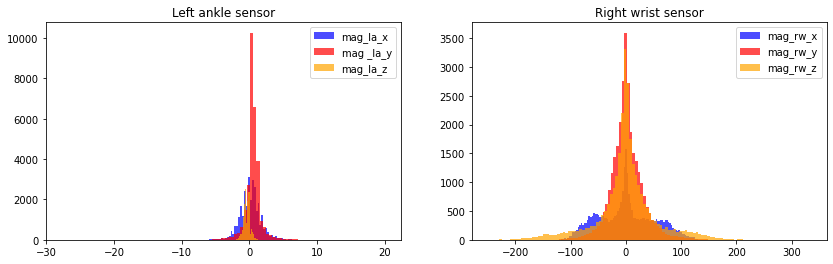

=================================== Knees bending (crouching) (20x) - acc ===================================


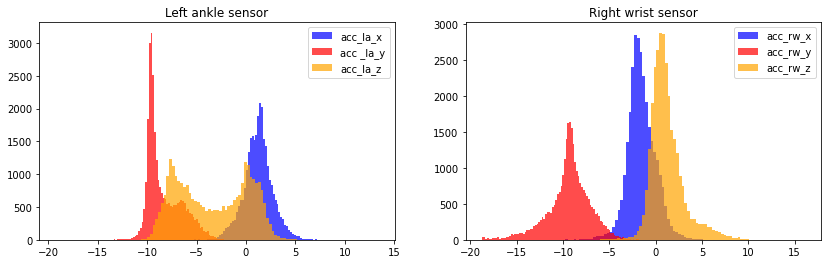

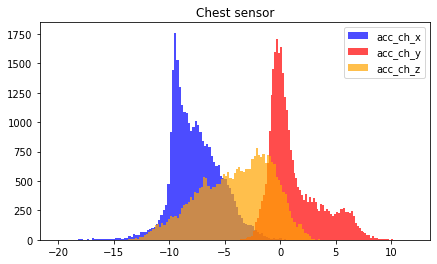

=================================== Knees bending (crouching) (20x) - gyr ===================================


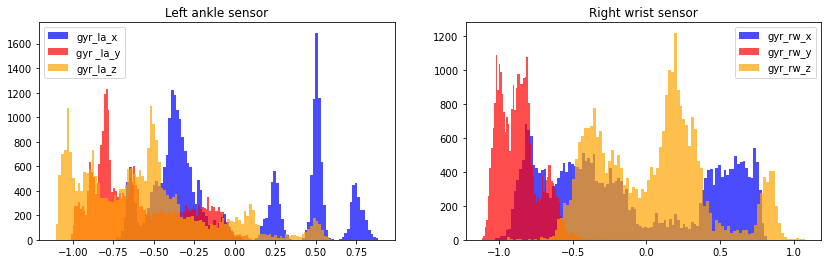

=================================== Knees bending (crouching) (20x) - mag ===================================


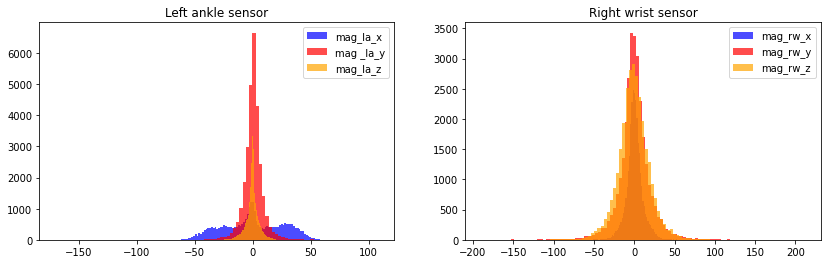

=================================== Cycling (1 min) - acc ===================================


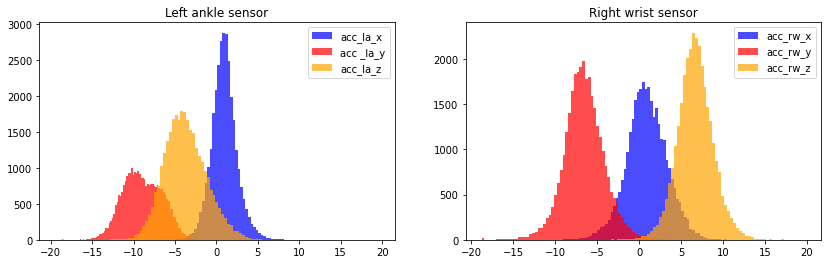

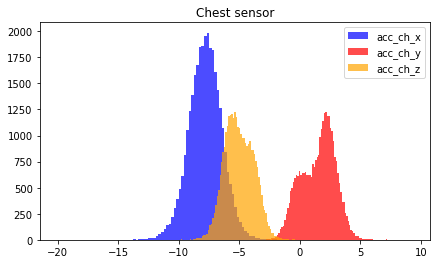

=================================== Cycling (1 min) - gyr ===================================


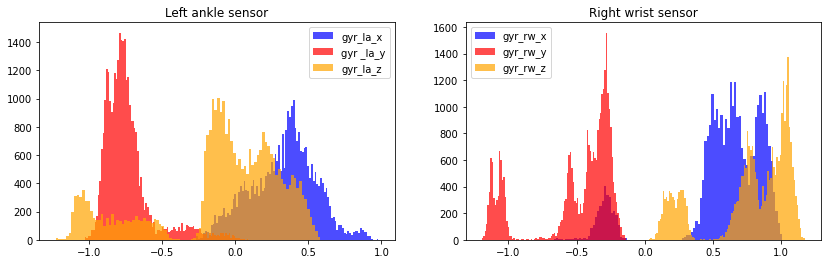

=================================== Cycling (1 min) - mag ===================================


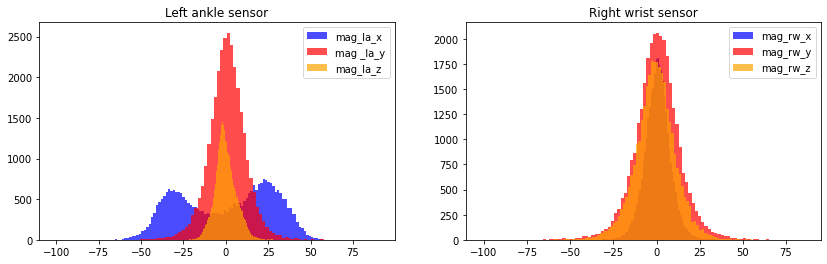

=================================== Jogging (1 min) - acc ===================================


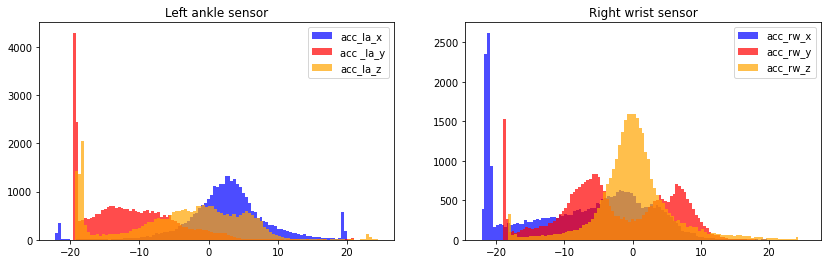

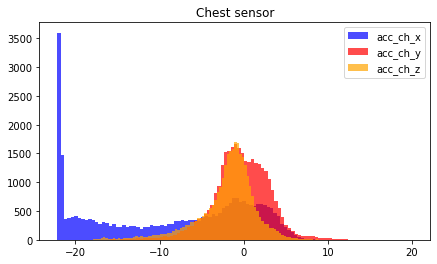

=================================== Jogging (1 min) - gyr ===================================


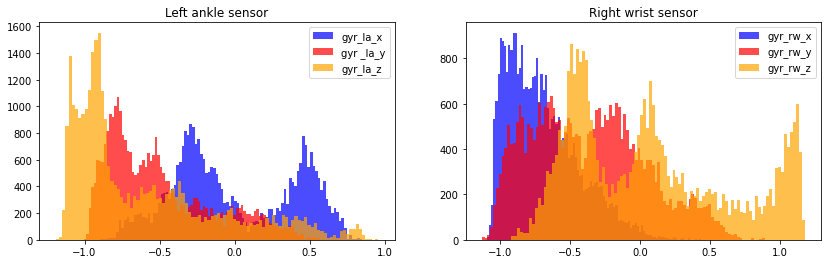

=================================== Jogging (1 min) - mag ===================================


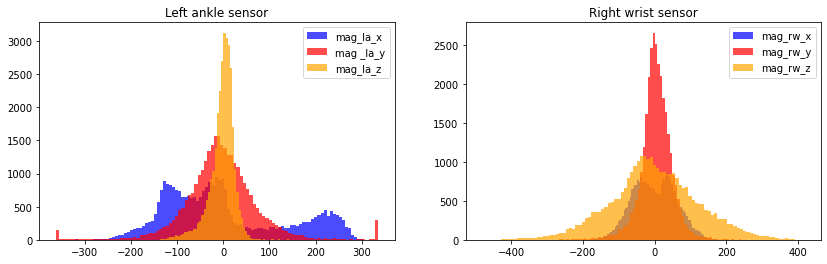

=================================== Running (1 min) - acc ===================================


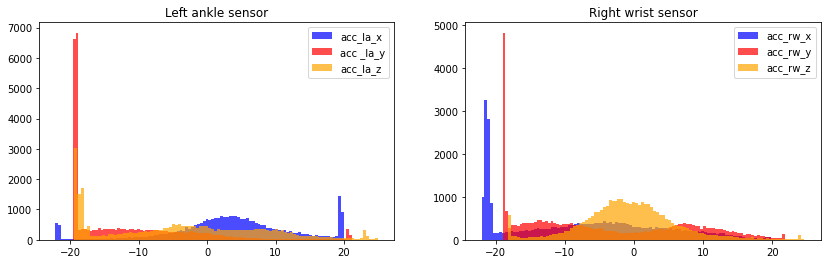

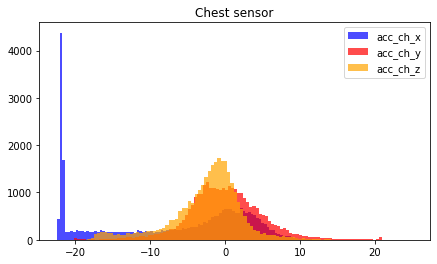

=================================== Running (1 min) - gyr ===================================


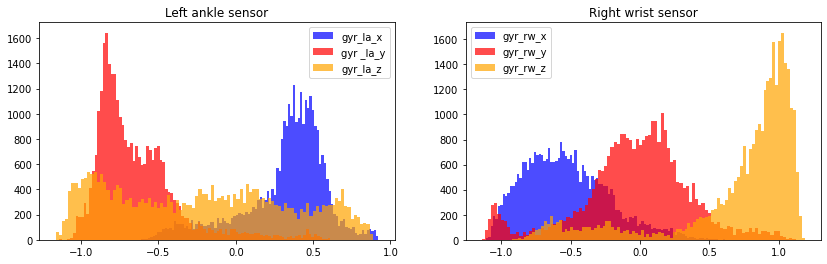

=================================== Running (1 min) - mag ===================================


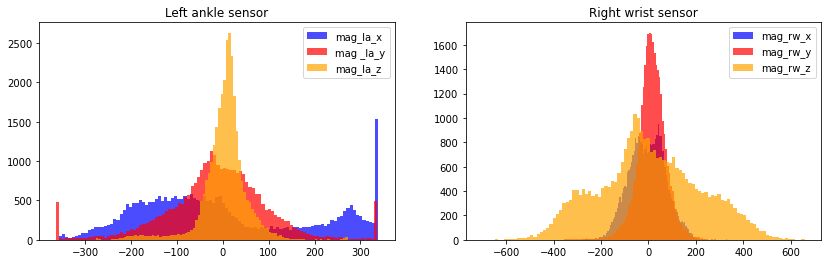

=================================== Jump front & back (20x) - acc ===================================


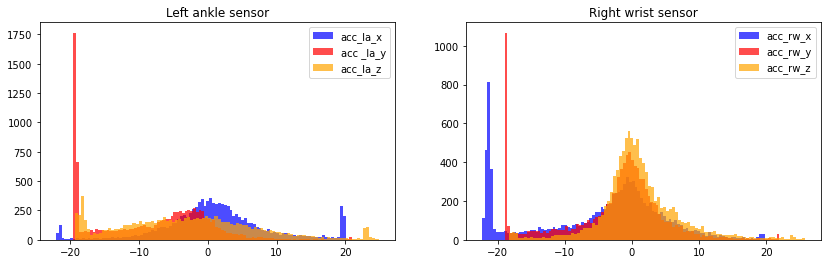

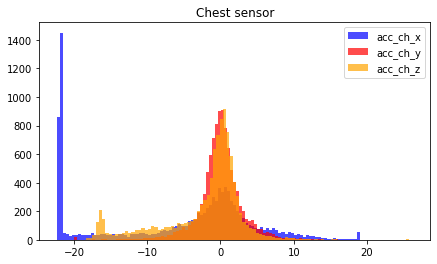

=================================== Jump front & back (20x) - gyr ===================================


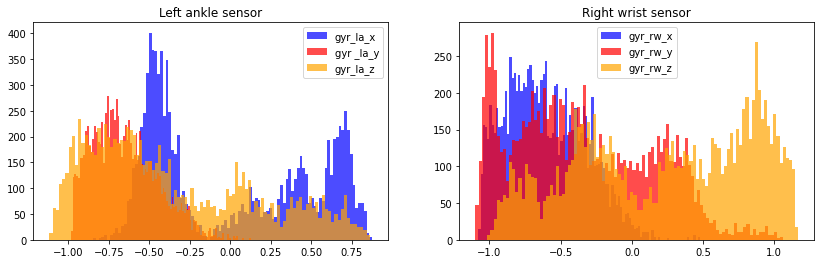

=================================== Jump front & back (20x) - mag ===================================


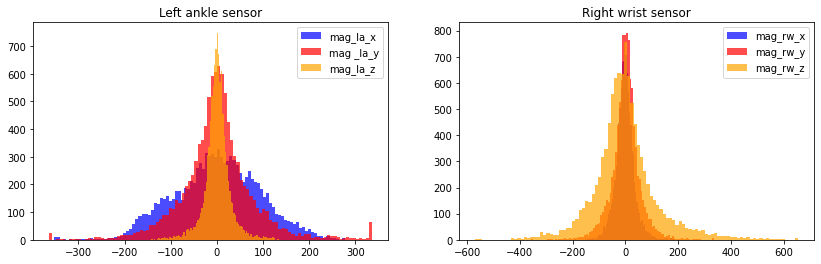

In [87]:
# Distribution plots for each activity and sensor
readings = ['acc', 'gyr', 'mag']

for i in range(1, 13):
    for r in readings:

        print(f'=================================== {activity_map[i]} - {r} ===================================')
        
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_la_x'], color='blue', alpha=.7, label= r + '_la_x', bins=100)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_la_y'],color='red', alpha=.7, label= r +' _la_y', bins=100)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_la_z'],color='orange', alpha=.7, label= r + '_la_z', bins=100)
        plt.title('Left ankle sensor')
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_rw_x'], color='blue', alpha=.7, label= r + '_rw_x', bins=100)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_rw_y'],color='red', alpha=.7, label= r + '_rw_y', bins=100)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_rw_z'],color='orange', alpha=.7, label= r + '_rw_z', bins=100)
        plt.title('Right wrist sensor')
        plt.legend()
        plt.show()
        
        # No magnetometer or gyroscope data for the chest sensor
        if r == 'acc':
            plt.figure(figsize=(7,4))
            plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_ch_x'], color='blue', alpha=.7, label= r + '_ch_x', bins=100)
            plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_ch_y'],color='red', alpha=.7, label= r + '_ch_y', bins=100)
            plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_ch_z'],color='orange', alpha=.7, label= r + '_ch_z', bins=100)
            plt.title('Chest sensor')
            plt.legend() 
            plt.show()

In [78]:
# Based on poor model computation performance with the full (balanced) data set, it may be a good idea to find
# an acceptable undersampled dataset that covers a similar distribution to the full data set.
data['activity'].value_counts()

0     30720
1     30720
2     30720
3     30720
4     30720
5     30720
9     30720
10    30720
11    30720
7     29441
8     29337
6     28315
12    10342
Name: activity, dtype: int64

In [83]:
# This function will take the same number of observations from each activity category
def resample_data(data, num_observations):
    resampled_data = pd.DataFrame()
    for i in range(0, 13):
        data_activity_i = data[data['activity'] == i]
        data_activity_i = data_activity_i.sample(n=num_observations, random_state=1)
        resampled_data = pd.concat([data_activity_i, resampled_data])
    return resampled_data

In [84]:
resampled_data = resample_data(data, 3000)
resampled_data.head()

acc_ch_x  acc_ch_y  acc_ch_z  acc_la_x  acc_la_y  acc_la_z  gyr_la_x  \
850837 -21.78300 -3.794900   -7.9521    3.9643  -19.2610  -0.38175   0.20779   
716654  -2.15530  0.190500    1.0171    3.1057   -4.7165  -3.32980   0.39147   
275149   7.01840  0.087807   -5.8026    3.8237    3.6411 -18.07100  -0.27644   
113762   0.81034 -0.618230   -2.0135  -21.3150  -19.1280  22.81000   0.73284   
528405 -21.75600 -5.118700  -11.9030   -5.8230  -19.3550  -6.75510  -0.49907   

        gyr_la_y  gyr_la_z  mag_la_x  ...  acc_rw_y  acc_rw_z  gyr_rw_x  \
850837  -0.96248 -0.064833    25.358  ... -18.57200   4.81100  -0.38039   
716654  -0.63977  0.526520  -112.910  ...   0.21375  -2.62470  -0.88824   
275149  -0.70169 -0.778000    35.207  ...  -1.60260  -0.25721  -1.00200   
113762  -0.60225 -0.227900  -342.760  ...   1.40960   1.95590  -0.61373   
528405  -0.84428  0.306480   -71.226  ... -18.58100  12.87300  -1.03140   

        gyr_rw_y  gyr_rw_z  mag_rw_x  mag_rw_y  mag_rw_z  activity   subject  
850837 -0.624230   0.84914    5.4721   62.4750   46.0550        12  subject7  
716654 -0.149900   0.61422   39.9060   22.9280  -62.9690        12  subject6  
275149 -0.316220   0.31250  -27.5170   67.0070   -5.5525        12  subject2  
113762  0.377820   0.84698  -13.3470   -6.1104  -25.4770        12  subject1  
528405  0.067762   0.32112   64.4480  -54.2540  228.9100        12  subject4  

[5 rows x 23 columns]

=================================== Standing still (1 min) - acc ===================================


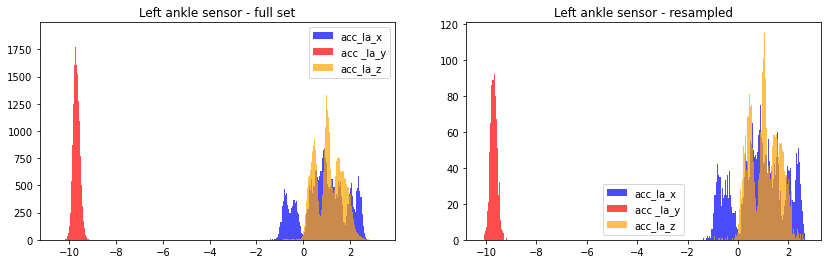

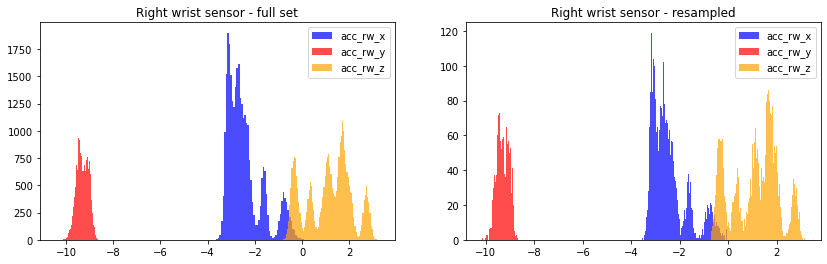

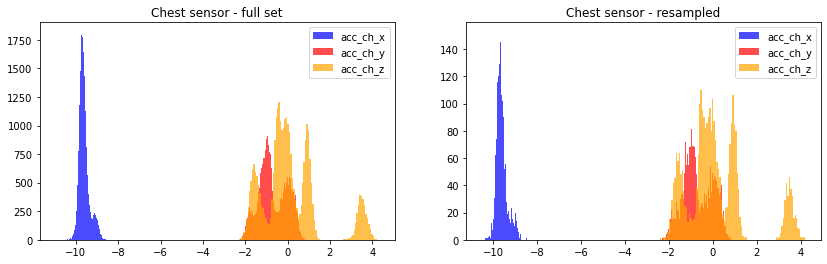

=================================== Standing still (1 min) - gyr ===================================


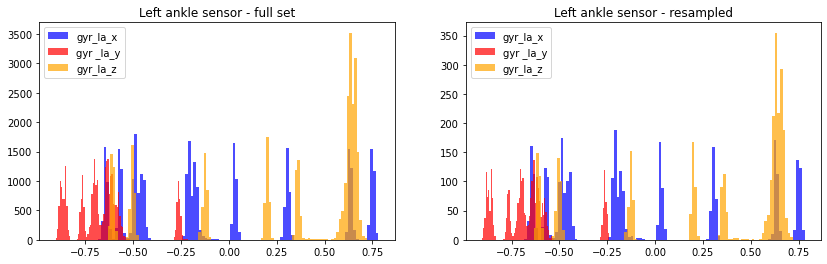

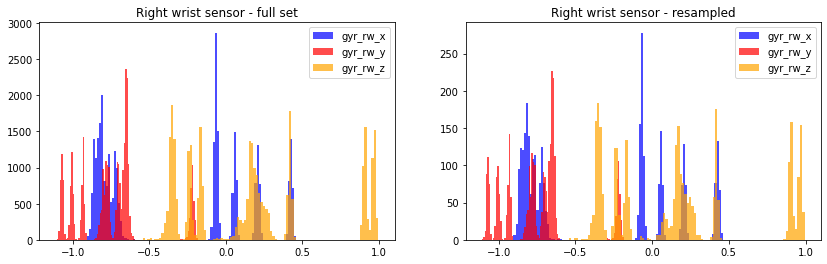

=================================== Standing still (1 min) - mag ===================================


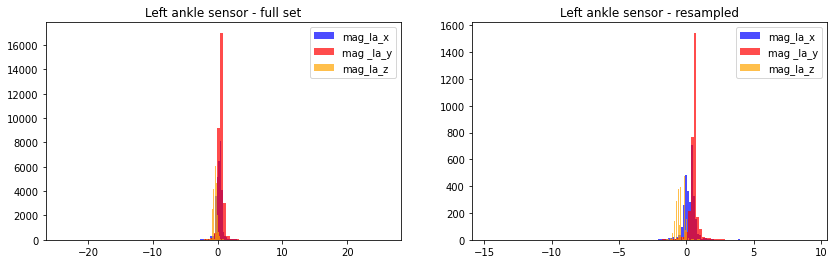

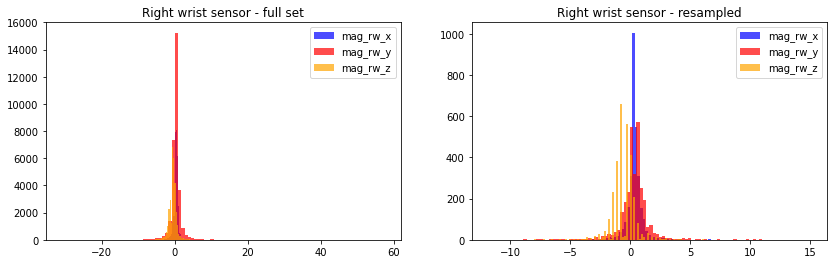

=================================== Sitting and relaxing (1 min) - acc ===================================


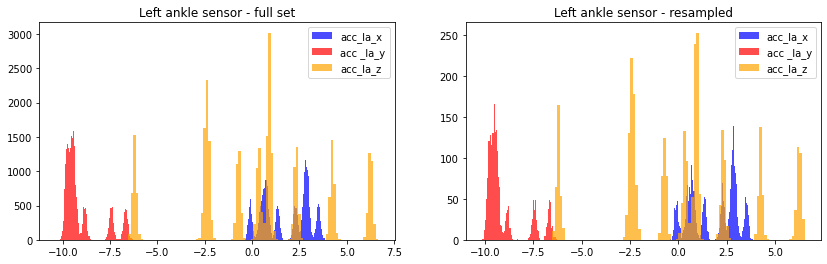

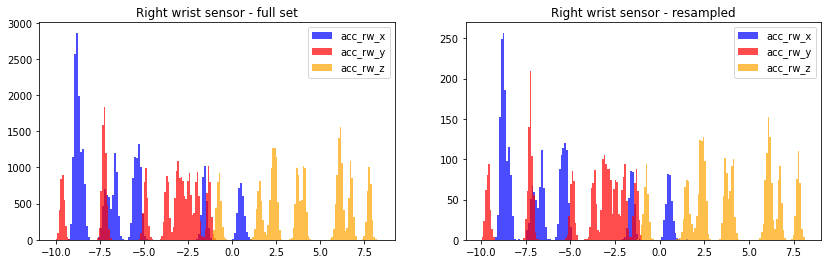

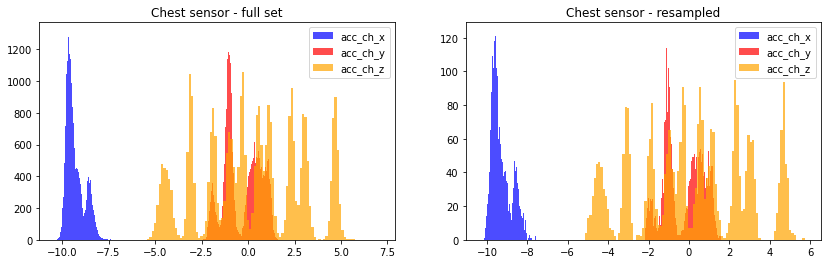

=================================== Sitting and relaxing (1 min) - gyr ===================================


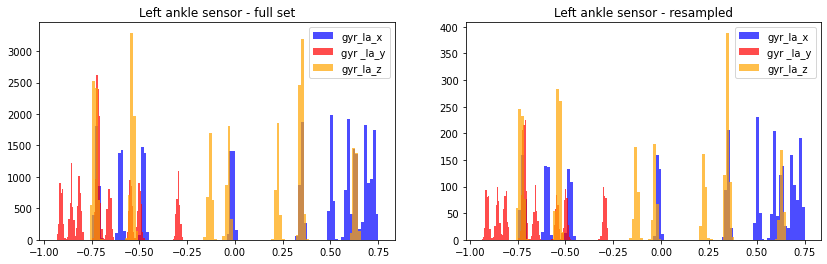

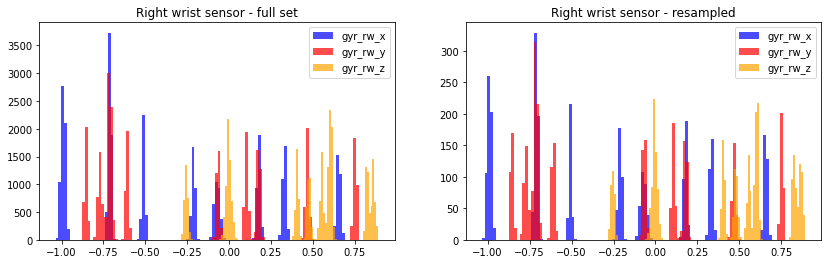

=================================== Sitting and relaxing (1 min) - mag ===================================


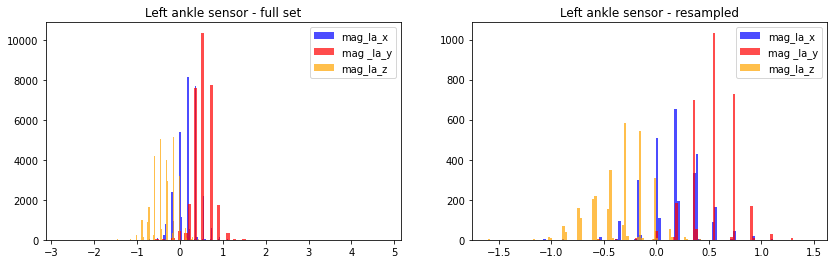

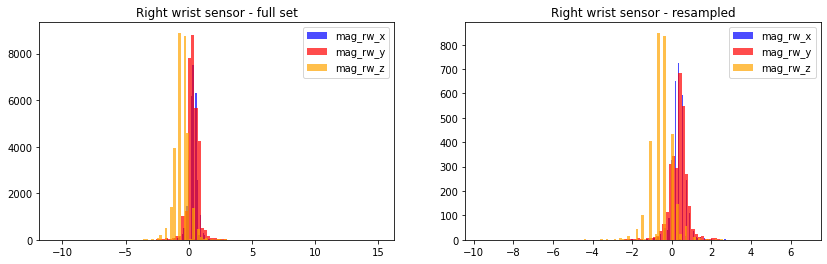

=================================== Lying down (1 min) - acc ===================================


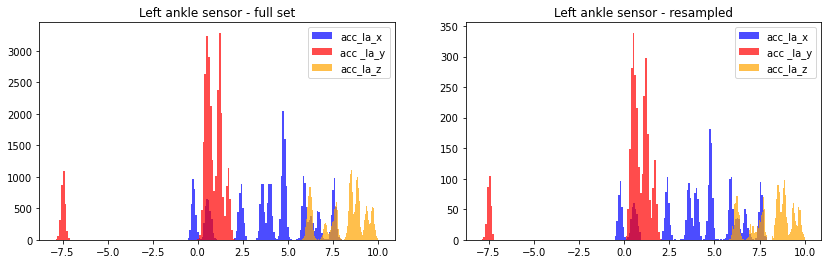

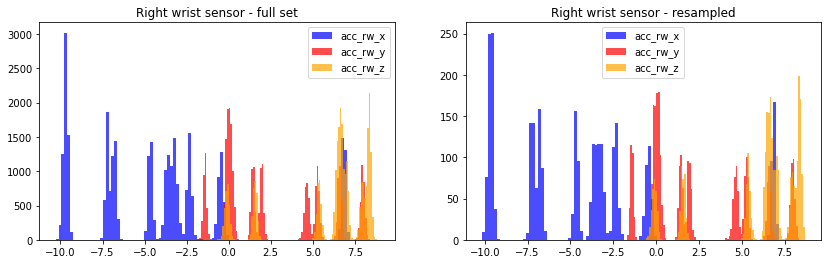

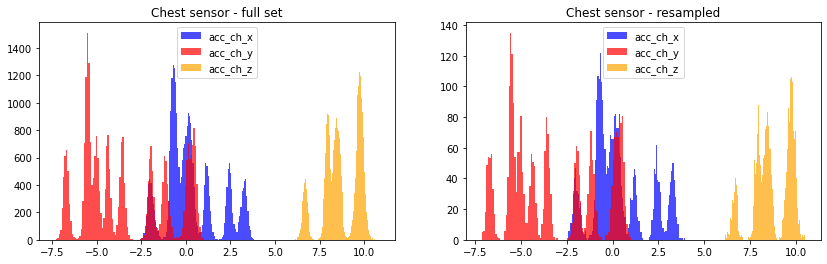

=================================== Lying down (1 min) - gyr ===================================


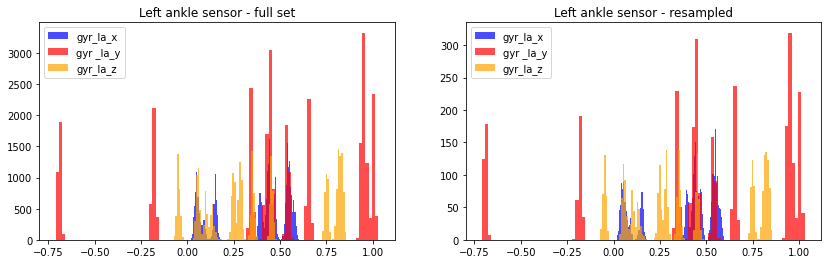

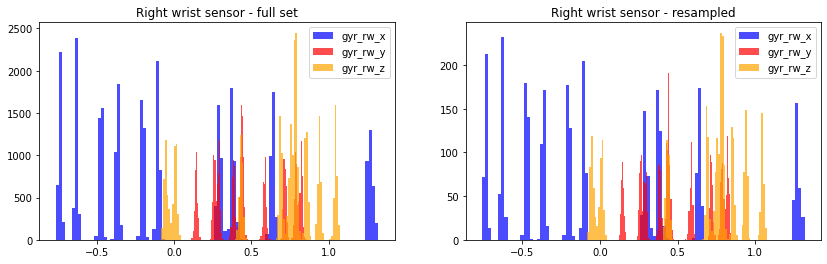

=================================== Lying down (1 min) - mag ===================================


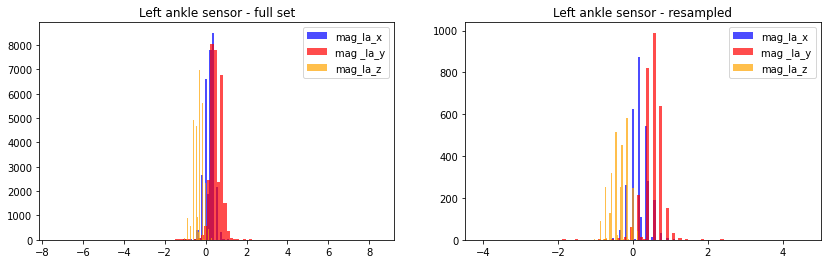

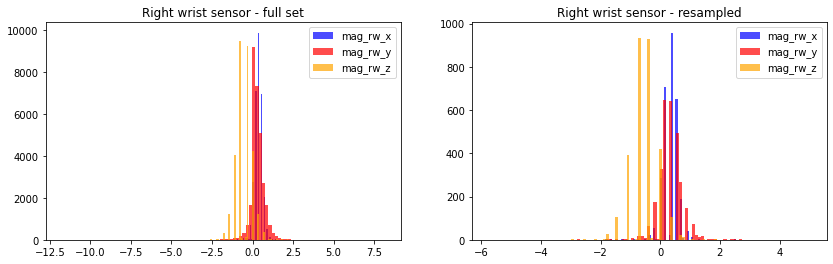

=================================== Walking (1 min) - acc ===================================


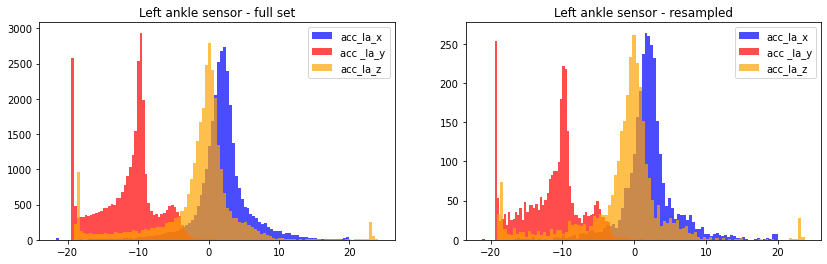

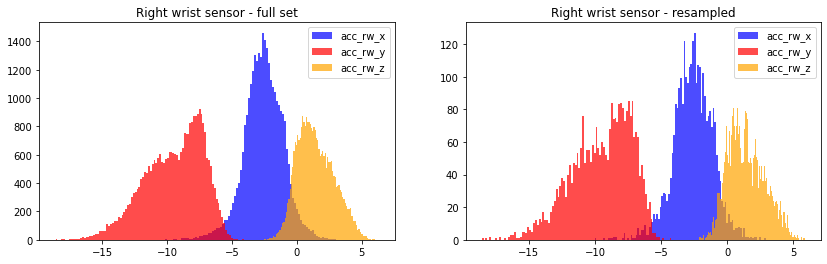

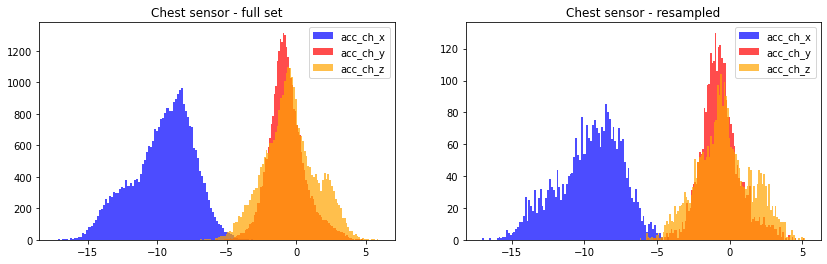

=================================== Walking (1 min) - gyr ===================================


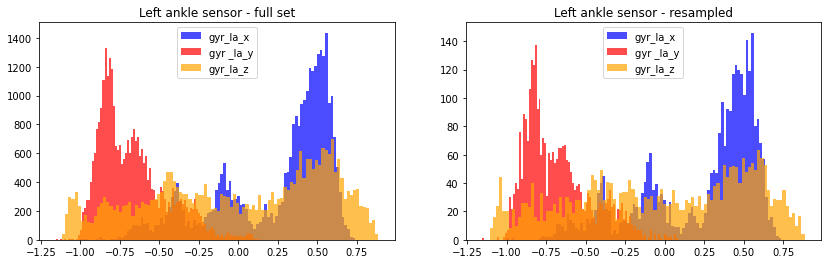

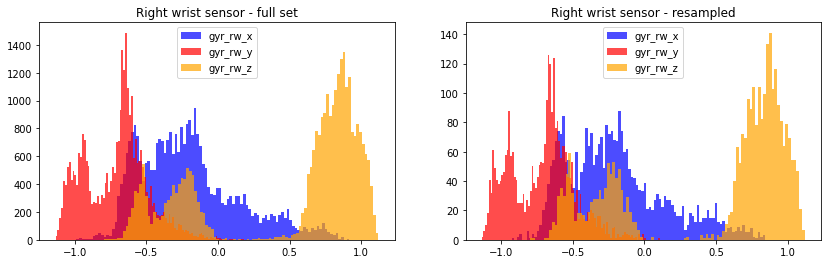

=================================== Walking (1 min) - mag ===================================


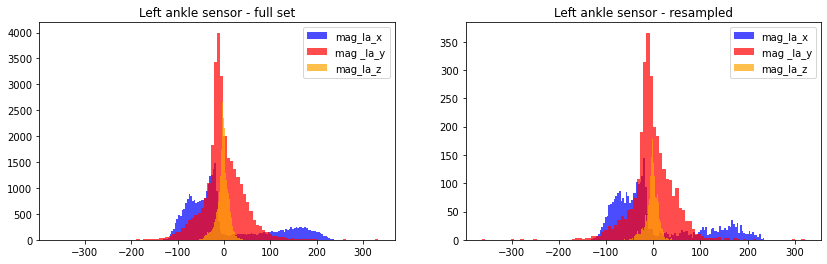

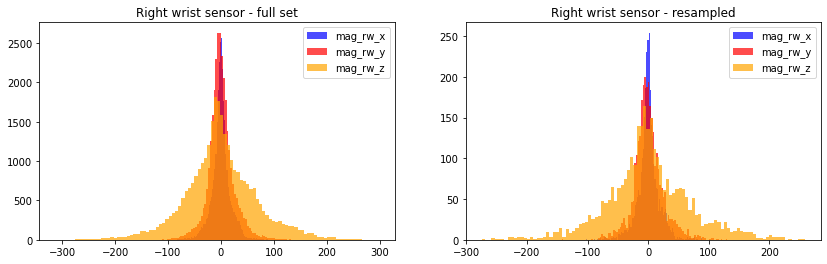

=================================== Climbing stairs (1 min) - acc ===================================


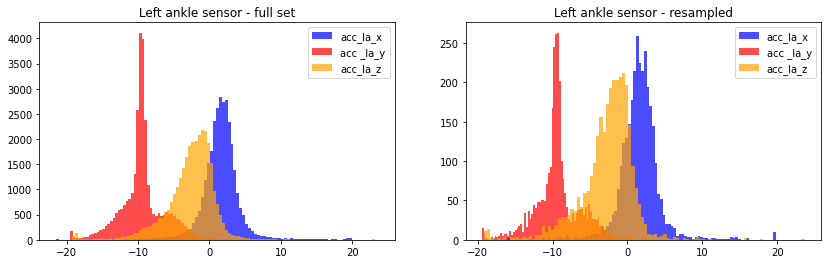

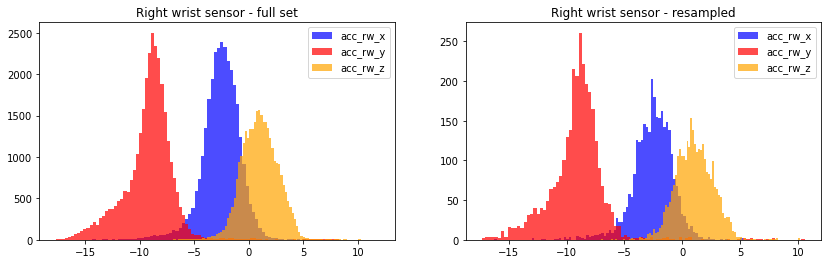

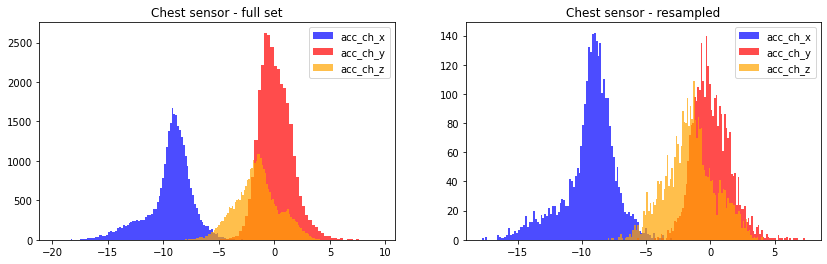

=================================== Climbing stairs (1 min) - gyr ===================================


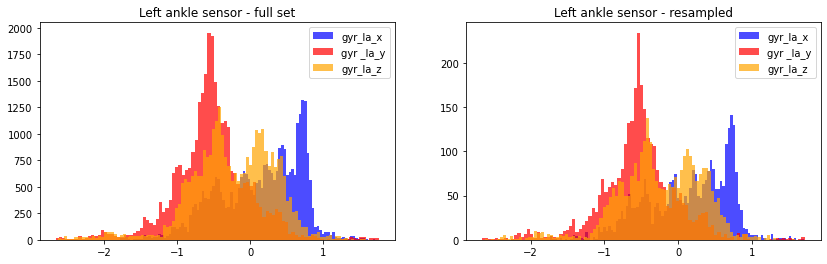

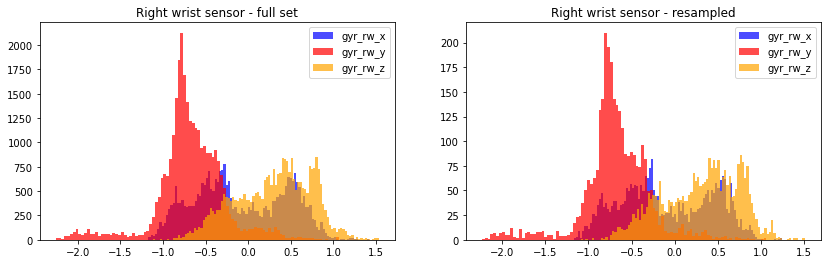

=================================== Climbing stairs (1 min) - mag ===================================


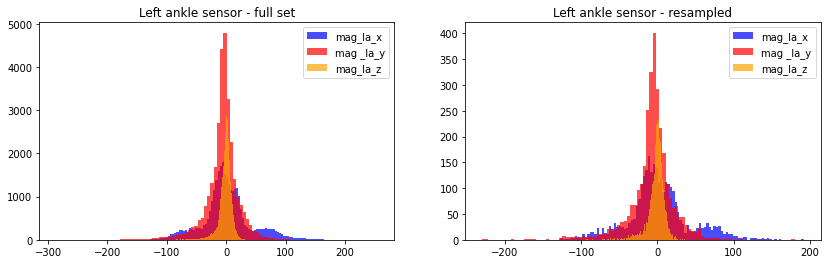

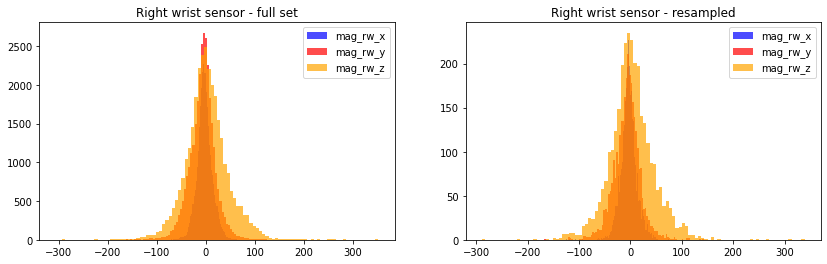

=================================== Waist bends forward (20x) - acc ===================================


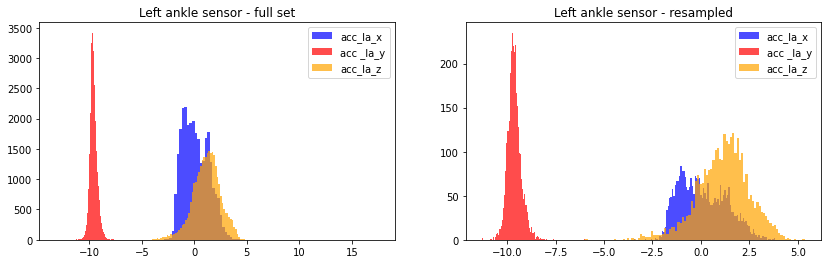

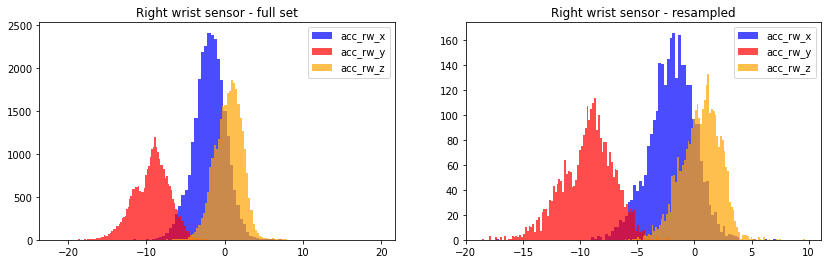

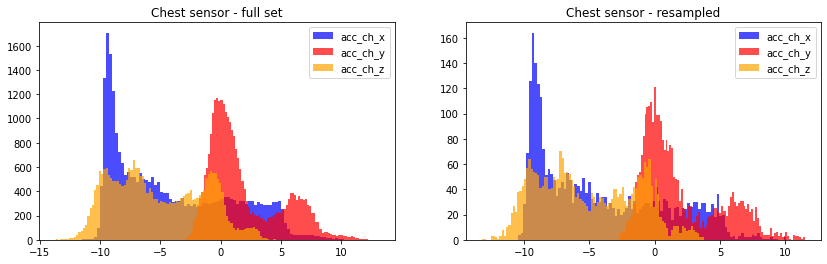

=================================== Waist bends forward (20x) - gyr ===================================


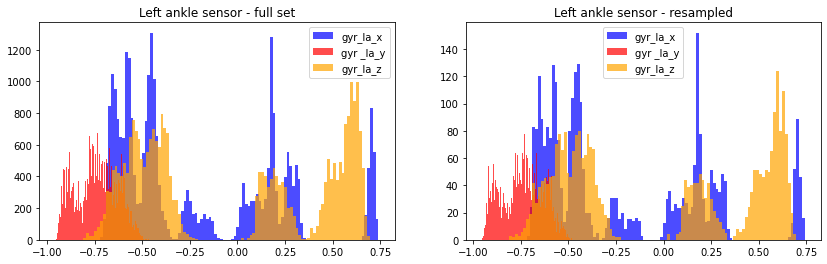

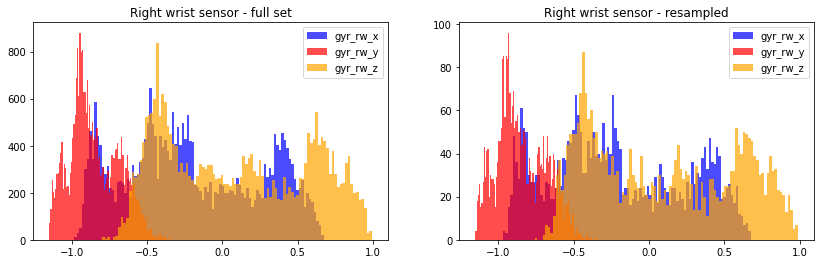

=================================== Waist bends forward (20x) - mag ===================================


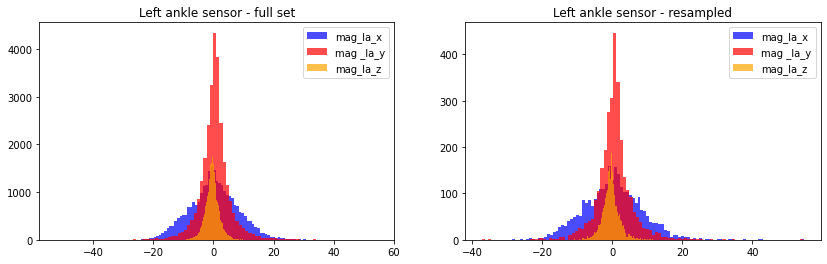

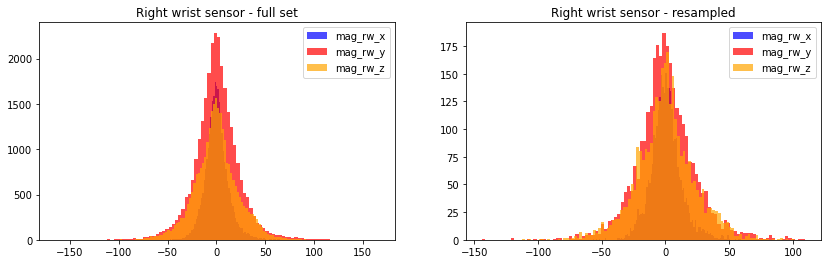

=================================== Frontal elevation of arms (20x) - acc ===================================


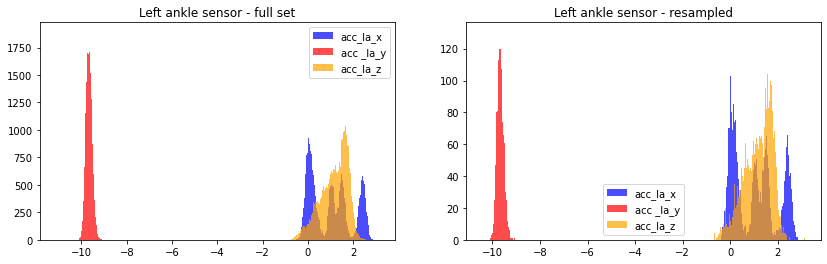

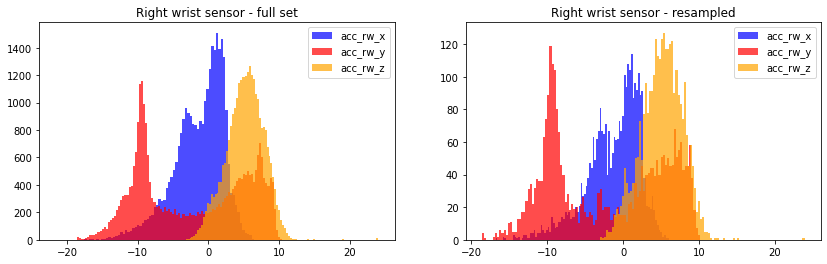

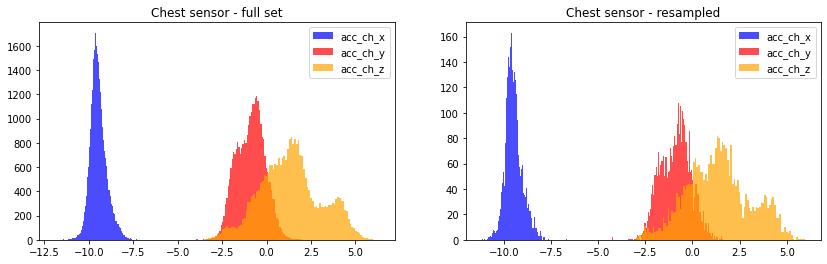

=================================== Frontal elevation of arms (20x) - gyr ===================================


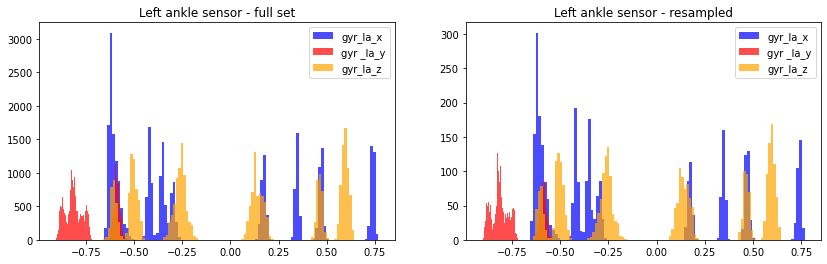

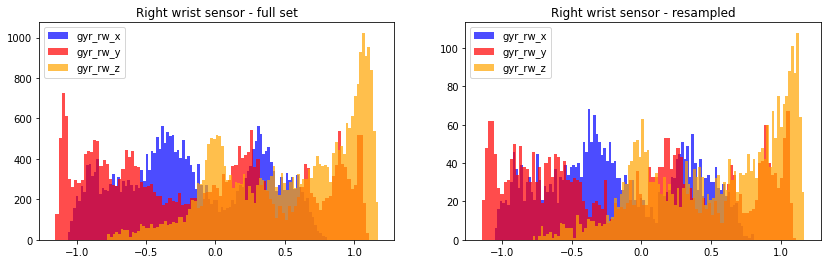

=================================== Frontal elevation of arms (20x) - mag ===================================


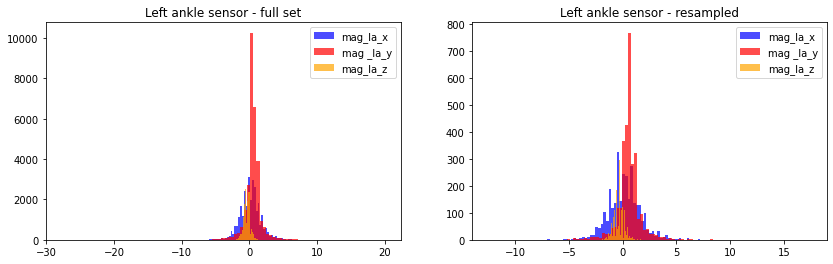

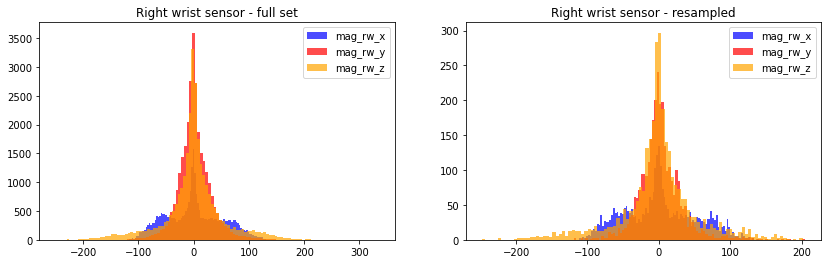

=================================== Knees bending (crouching) (20x) - acc ===================================


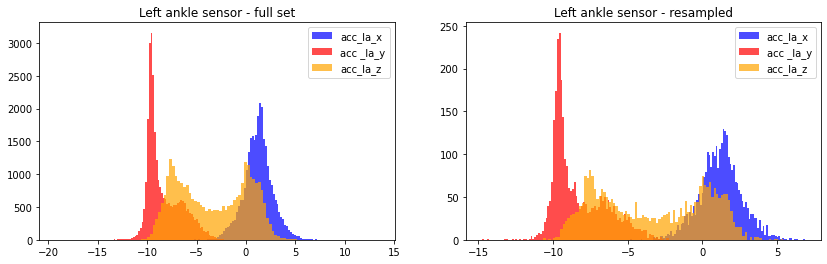

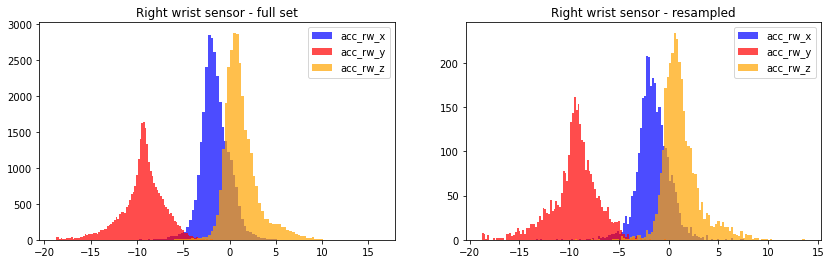

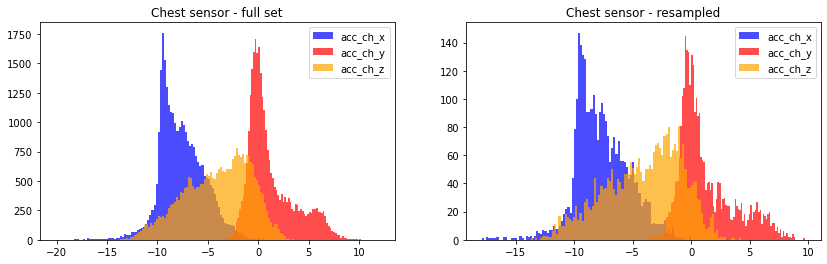

=================================== Knees bending (crouching) (20x) - gyr ===================================


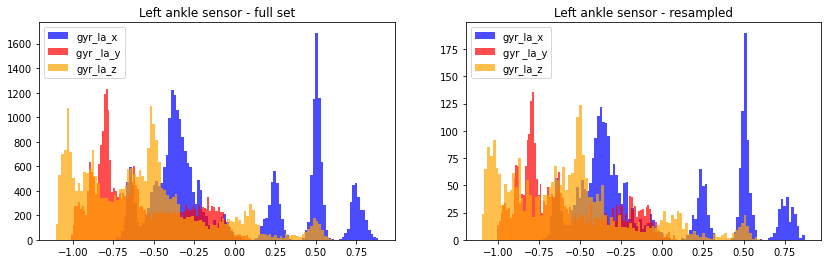

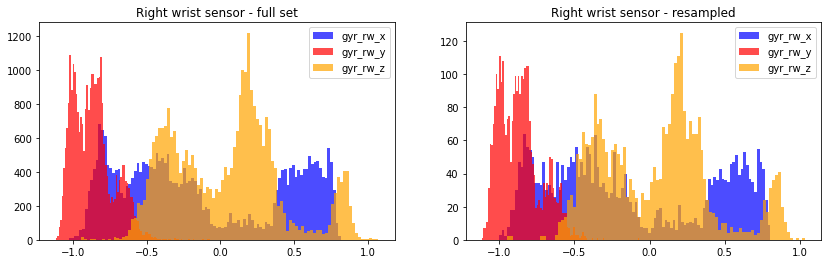

=================================== Knees bending (crouching) (20x) - mag ===================================


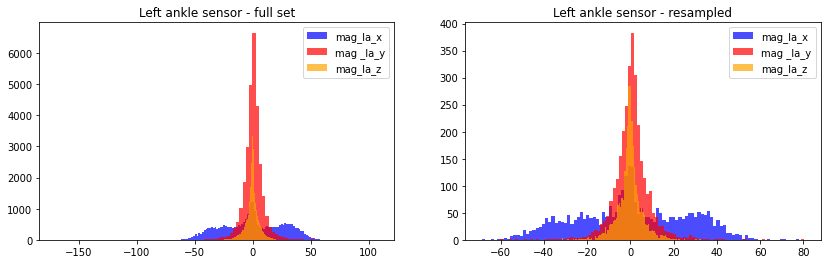

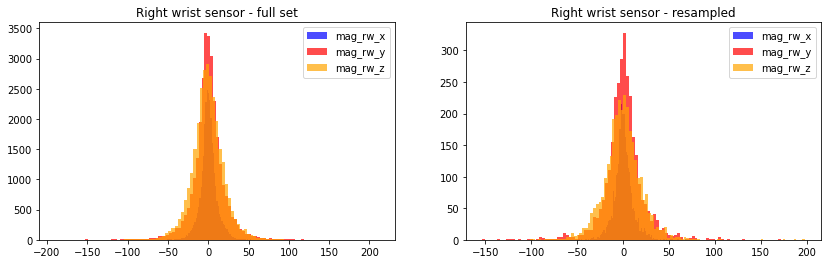

=================================== Cycling (1 min) - acc ===================================


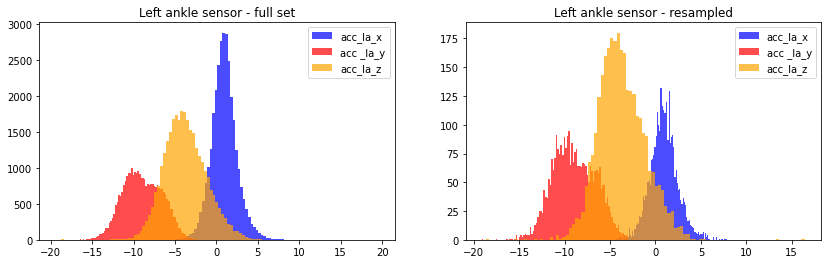

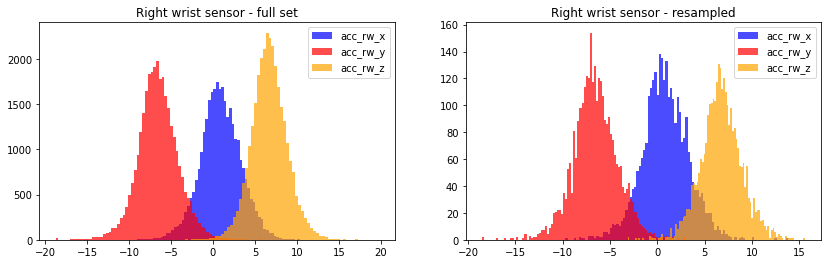

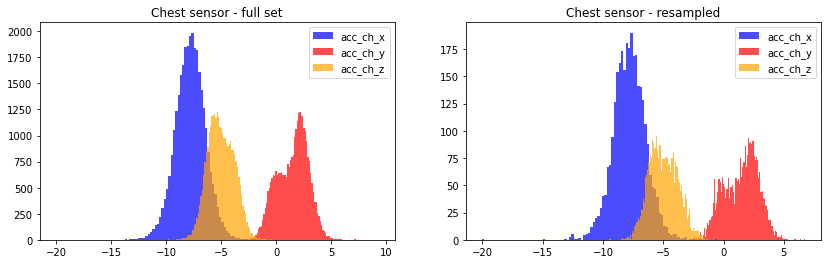

=================================== Cycling (1 min) - gyr ===================================


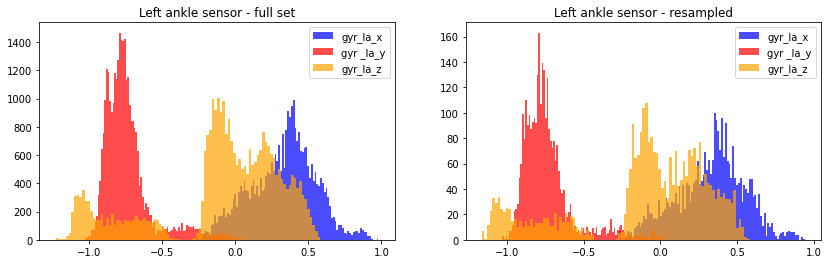

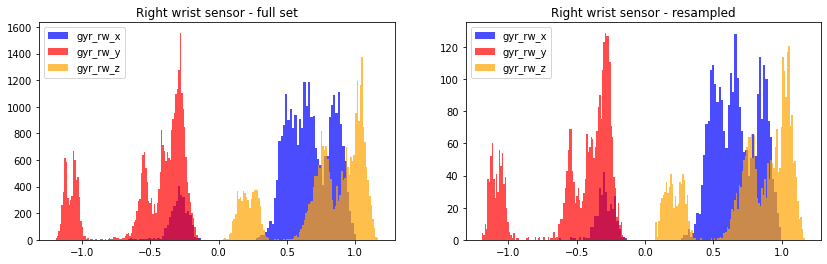

=================================== Cycling (1 min) - mag ===================================


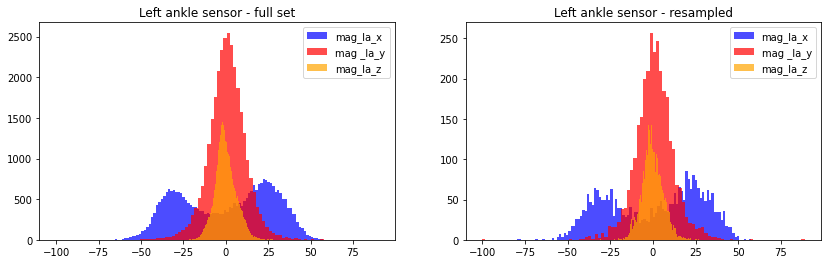

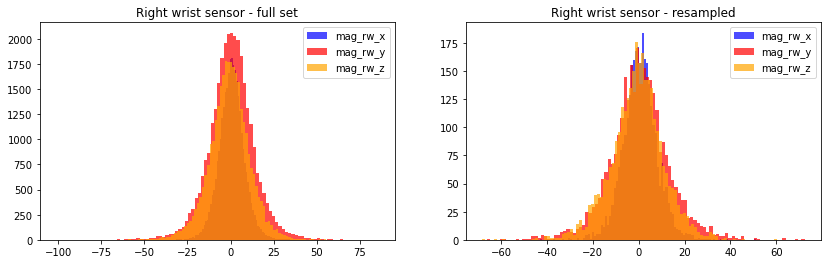

=================================== Jogging (1 min) - acc ===================================


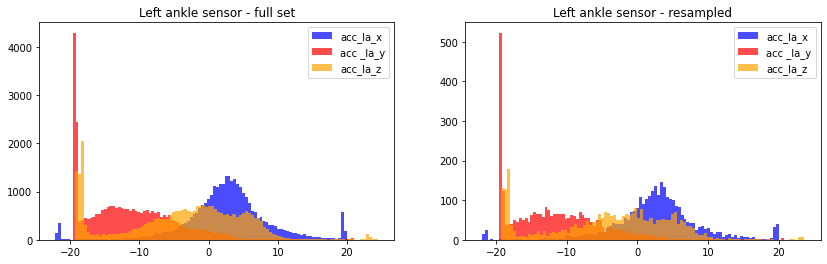

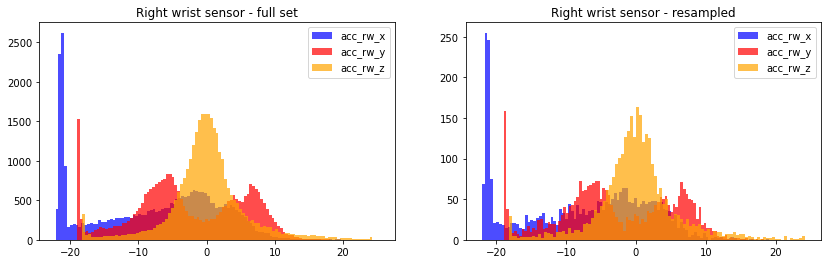

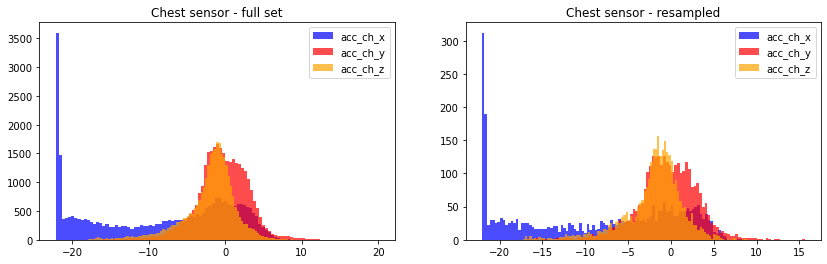

=================================== Jogging (1 min) - gyr ===================================


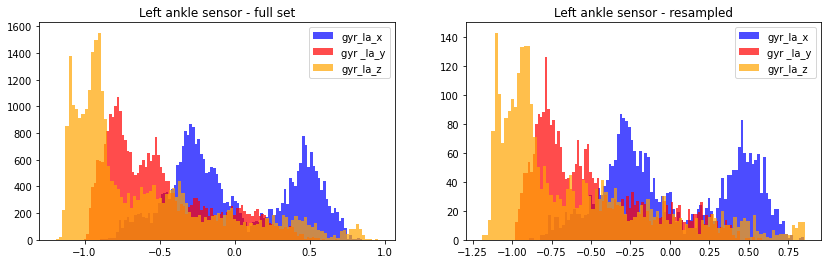

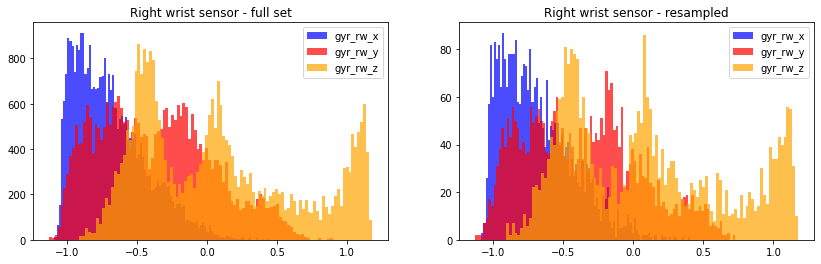

=================================== Jogging (1 min) - mag ===================================


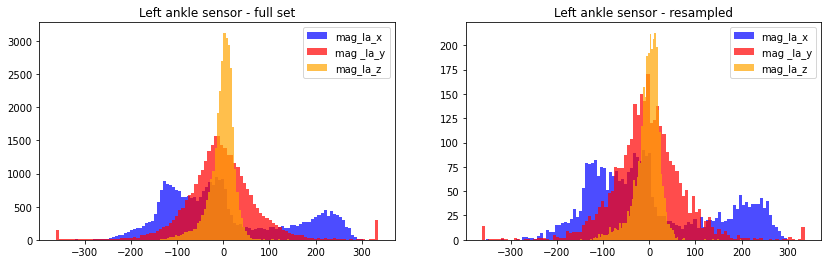

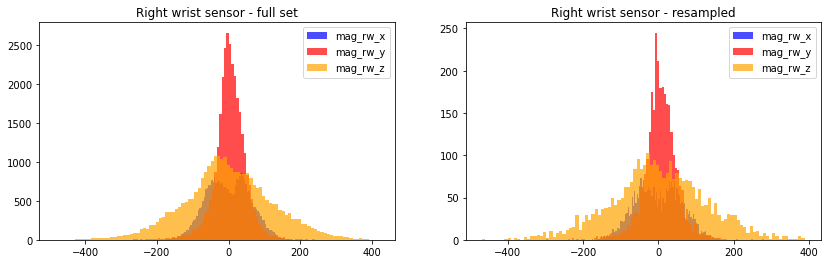

=================================== Running (1 min) - acc ===================================


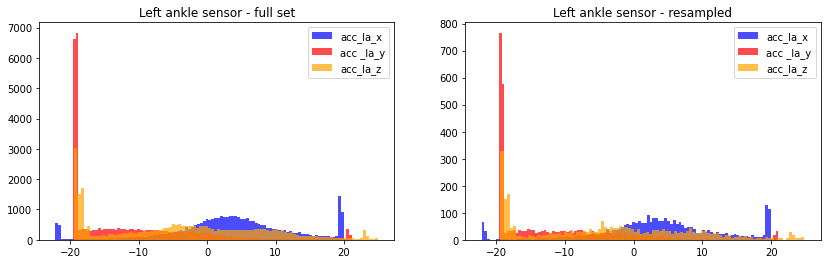

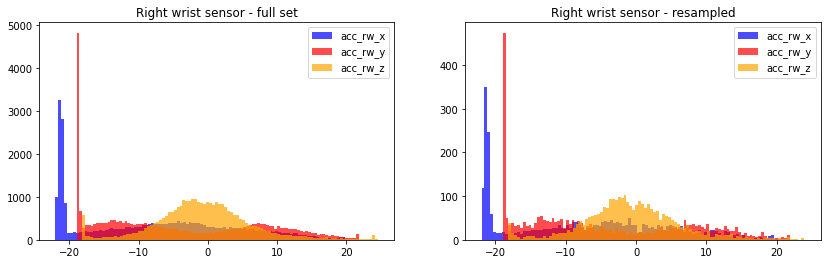

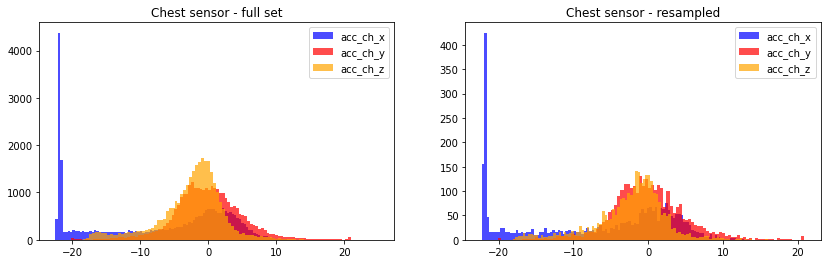

=================================== Running (1 min) - gyr ===================================


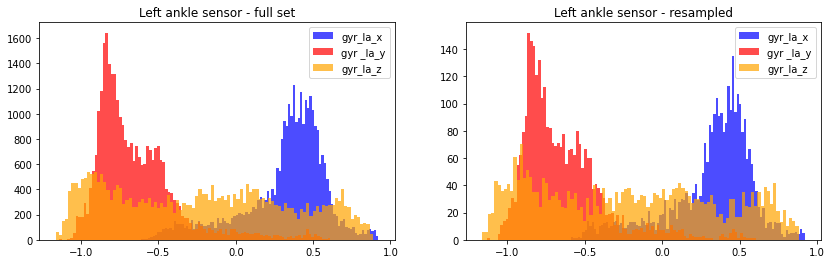

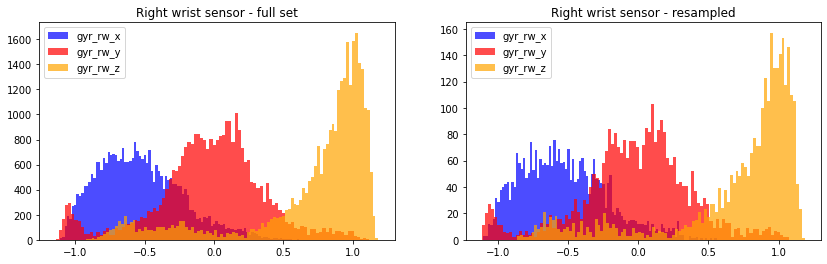

=================================== Running (1 min) - mag ===================================


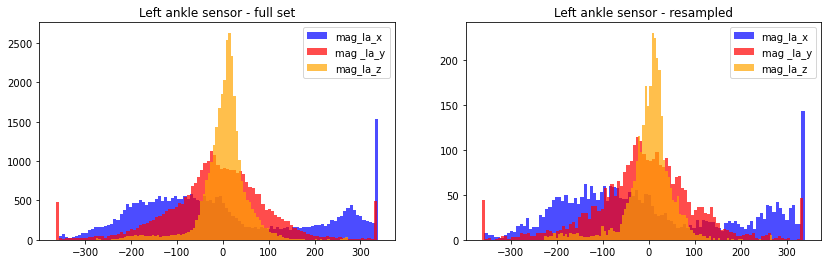

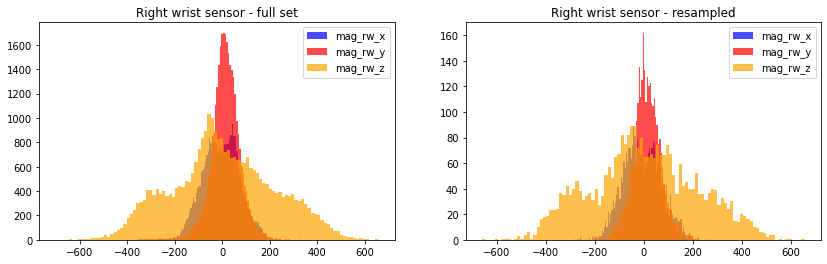

=================================== Jump front & back (20x) - acc ===================================


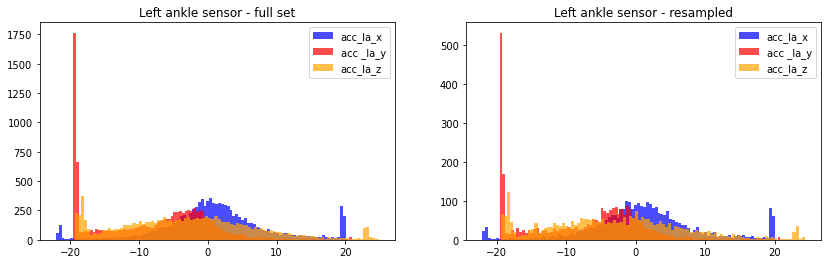

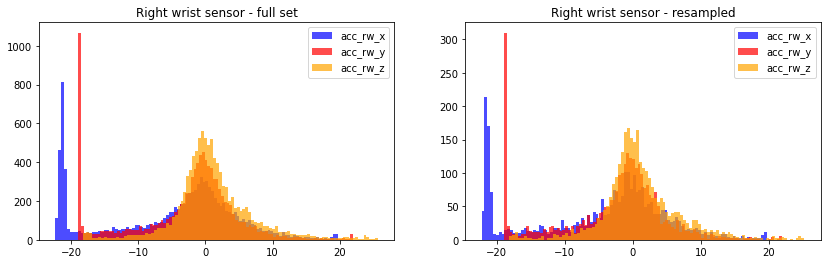

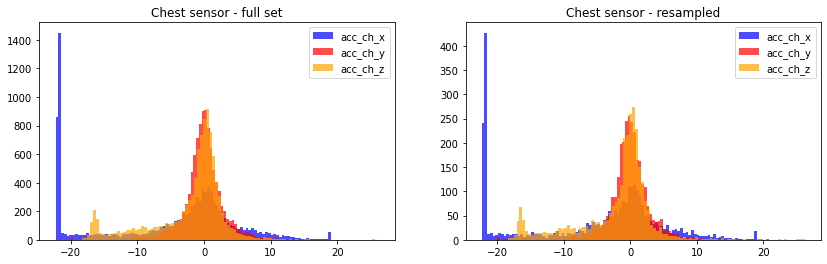

=================================== Jump front & back (20x) - gyr ===================================


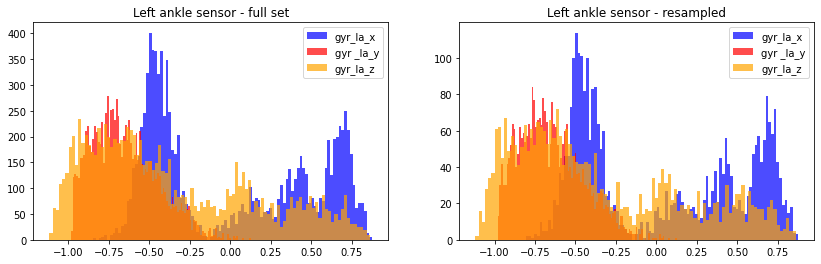

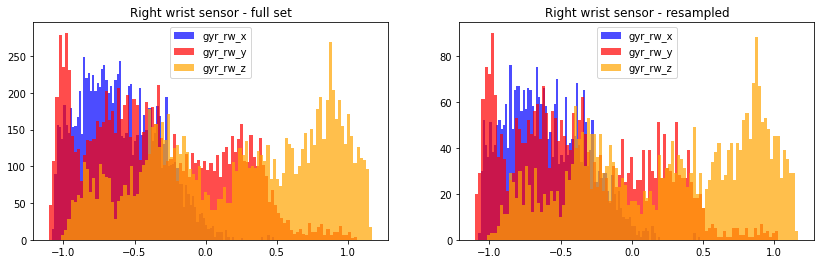

=================================== Jump front & back (20x) - mag ===================================


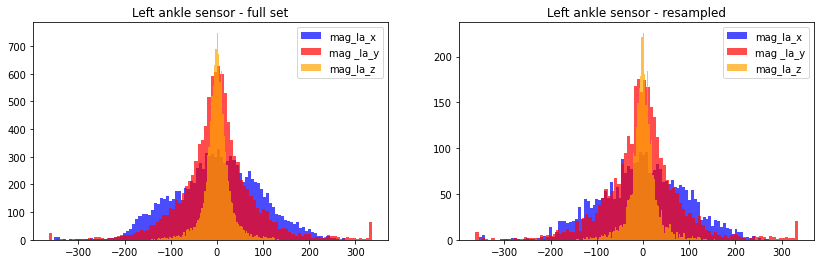

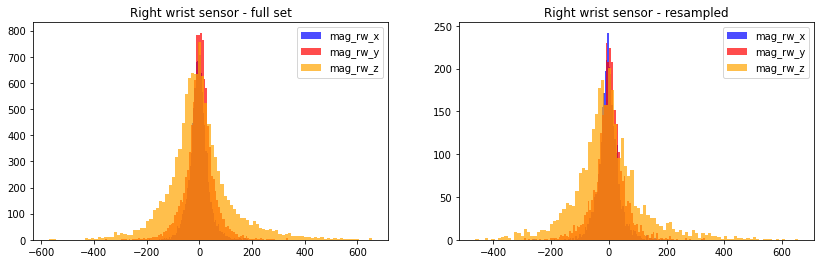

In [89]:
# Compare distribution plots of full (balanced) dataset and resampled dataset for each activity and sensor
# Note: It looks like resampling to 3000 from each activity results in very similar distribution plot when compared
# to the full dataset. Hence, this size per activity may be sufficient for the models
readings = ['acc', 'gyr', 'mag']

for i in range(1, 13):
    for r in readings:

        print(f'=================================== {activity_map[i]} - {r} ===================================')
        
        # Full set
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_la_x'], color='blue', alpha=.7, label= r + '_la_x', bins=100)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_la_y'],color='red', alpha=.7, label= r +' _la_y', bins=100)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_la_z'],color='orange', alpha=.7, label= r + '_la_z', bins=100)
        plt.title('Left ankle sensor - full set')
        plt.legend()
        
        # Resampled
        plt.subplot(1,2,2)
        plt.hist(resampled_data[resampled_data['activity']==i].reset_index(drop=True)[r + '_la_x'], color='blue', alpha=.7, label= r + '_la_x', bins=100)
        plt.hist(resampled_data[resampled_data['activity']==i].reset_index(drop=True)[r + '_la_y'],color='red', alpha=.7, label= r +' _la_y', bins=100)
        plt.hist(resampled_data[resampled_data['activity']==i].reset_index(drop=True)[r + '_la_z'],color='orange', alpha=.7, label= r + '_la_z', bins=100)
        plt.title('Left ankle sensor - resampled')
        plt.legend()
        plt.show()
        
        # Full set
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_rw_x'], color='blue', alpha=.7, label= r + '_rw_x', bins=100)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_rw_y'],color='red', alpha=.7, label= r + '_rw_y', bins=100)
        plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_rw_z'],color='orange', alpha=.7, label= r + '_rw_z', bins=100)
        plt.title('Right wrist sensor - full set')
        plt.legend()
        
        # Resampled
        plt.subplot(1,2,2)
        plt.hist(resampled_data[resampled_data['activity']==i].reset_index(drop=True)[r + '_rw_x'], color='blue', alpha=.7, label= r + '_rw_x', bins=100)
        plt.hist(resampled_data[resampled_data['activity']==i].reset_index(drop=True)[r + '_rw_y'],color='red', alpha=.7, label= r + '_rw_y', bins=100)
        plt.hist(resampled_data[resampled_data['activity']==i].reset_index(drop=True)[r + '_rw_z'],color='orange', alpha=.7, label= r + '_rw_z', bins=100)
        plt.title('Right wrist sensor - resampled')
        plt.legend()
        plt.show()
        
        # No magnetometer or gyroscope data for the chest sensor
        if r == 'acc':
            
            # Full set
            plt.figure(figsize=(14,4))
            plt.subplot(1,2,1)
            plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_ch_x'], color='blue', alpha=.7, label= r + '_ch_x', bins=100)
            plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_ch_y'],color='red', alpha=.7, label= r + '_ch_y', bins=100)
            plt.hist(data[data['activity']==i].reset_index(drop=True)[r + '_ch_z'],color='orange', alpha=.7, label= r + '_ch_z', bins=100)
            plt.title('Chest sensor - full set')
            plt.legend() 
            
            # Resampled
            plt.subplot(1,2,2)
            plt.hist(resampled_data[resampled_data['activity']==i].reset_index(drop=True)[r + '_ch_x'], color='blue', alpha=.7, label= r + '_ch_x', bins=100)
            plt.hist(resampled_data[resampled_data['activity']==i].reset_index(drop=True)[r + '_ch_y'],color='red', alpha=.7, label= r + '_ch_y', bins=100)
            plt.hist(resampled_data[resampled_data['activity']==i].reset_index(drop=True)[r + '_ch_z'],color='orange', alpha=.7, label= r + '_ch_z', bins=100)
            plt.title('Chest sensor - resampled')
            plt.legend() 
            plt.show()